In [36]:
# !pip install xgboost
!pip install catboost


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, chi2, SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, roc_auc_score, roc_curve,
                             RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, f1_score)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb
import lightgbm as lgb
from sklearn.decomposition import PCA
import shap
import catboost as cb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore")


ستون هایی که امکان ارتباط با ترک سیگار دارند

In [38]:
cols = ["x_smoker3", "x_llcpwt", "stopsmk2", "smokday2", "smoke100", "lastsmk2", "x_bmi5", "x_bmi5cat", "menthlth", "physhlth",
         "poorhlth", "genhlth", "cadult", "numadult", "hhadult", "x_age_g", "x_age80", "x_exteth3",
         "x_alteth3", "x_asthms1", "x_totinda", "x_ment14d", "x_phys14d", "copdbrth", "copdcogh", "sex1", "rmvteth4",
         "x_imprace", "x_educag", "marital", "x_incomg", "x_metstat", "x_urbstat", "employ1", "x_state", "weight2",
         "persdoc2", "checkup1", "pvtresd1", "exerany2", "sleptim1", "cvdinfr4", "cvdcrhd4", "cvdstrk3",
         "asthma3", "chccopd1", "havarth3", "addepev2", "chckdny1", "diabete3", "educa", "children", "height3",
         "diffwalk", "alcday5", "pneuvac4", "profexam", "lengexam", "sofemale", "somale", "casthdx2", "x_rfhlth",
         "x_ltasth1", "x_casthm1", "x_prace1", "x_racegr3", "x_ageg5yr", "wtkg3", "x_rfsmok3"]

# news = ["hlthcvr1","primins1","priminsr","ladult1","sexvar","x_incomg1","persdoc3","chccopd2","chccopd3","havarth4","havarth5","addepev3","chckdny2", "diabete4", "alcday4", "x_mrace1", "x_mrace2", "x_racegr4"]


# codes

In [ ]:
import zipfile
import os

!gdown --id 155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
# !gdown --id 1QdtD7qctXKLLQVNvM47L2WMh_BjxZ1D9
# !gdown --id 1gTmk3uUMlpzOe6pT3qCeHuJcN-fwCYfN
# !gdown --id 1X1YoZwy-AoWo-LwdFJGkqrtikLYxGFBH
!gdown --id 1GvRUJXPoql-22ufdE314VyK5BotH3QjF


# path = '/content/drive/MyDrive/Colab Notebooks/'
# path = '/kaggle/working/'
path = "/content/"

zip_filenames = ['BRFSS2021.zip']
for zip_filename in zip_filenames:
    if not os.path.exists(path + zip_filename):
        print(f"not find {zip_filename}")
    else:
        try:
            with zipfile.ZipFile(path + zip_filename, 'r') as zip_ref:
                zip_ref.extractall()
            print(f"extract completed {path + zip_filename}")

        except zipfile.BadZipFile:
            print("file not find")
        except Exception as e:
            print(f"exception {e}")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=155E3dCHUM0fazP7yS_jV7W_CyGFJiLjK
To: /content/res v1.1.csv
100% 6.28k/6.28k [00:00<00:00, 14.7MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GvRUJXPoql-22ufdE314VyK5BotH3QjF
From (redirected): https://drive.google.com/uc?id=1GvRUJXPoql-22ufdE314VyK5BotH3QjF&confirm=t&uuid=5b4a84f9-7ff7-40ac-a925-c976db31109e
To: /content/BRFSS2021.zip
100% 68.6M/68.6M [00:01<00:00, 50.9MB/s]
extract completed /content/BRFSS2021.zip


In [40]:
df = pd.read_stata("BRFSS2021.dta")

df = df.rename(columns={"ladult1":"cadult", "sexvar":"sex1", "priminsr":"hlthpln1", "chccopd3":"chccopd1", "havarth5":"havarth3", "addepev3":"addepev2",
                                "chckdny2":"chckdny1", "diabete4":"diabete3", "x_incomg1":"x_incomg", "persdoc3":"persdoc2"})
res = pd.read_csv(path + "res v1.1.csv", index_col="Unnamed: 0")
res


,2018,2019,2020,2021,2022,2023
x_smoker3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
x_llcpwt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
stopsmk2,0.860560,0.865789,0.870096,0.945413,0.957801,0.952373
smokday2,0.587787,0.597208,0.610322,0.618291,0.631451,0.633901
smoke100,0.037505,0.044323,0.051431,0.055759,0.078539,0.052081
...,...,...,...,...,...,...
x_prace1,0.000073,0.000053,0.000022,0.000009,0.000025,0.000586
x_racegr3,0.000002,0.000007,0.000002,0.000000,0.000004,0.000198
x_ageg5yr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
wtkg3,0.065317,0.071122,0.086944,0.092520,0.094529,0.078812


In [41]:
replacement_dict = {
    'x_smoker3' : [9],
    'weight2': [7777, 9999],
    'height3': [7777, 9999],
    'children': [99],
    'hhadult': [77, 99],
    'alcday5': [777, 999],
    'menthlth': [77, 99],
    'physhlth': [77, 99],
    'poorhlth': [77, 99],
    'smoke100': [7, 9],
    'genhlth': [7, 9],
    '_smoker3': [9],
    'stopsmk2': [7, 9, 77, 99],
    '_asthms1': [9],
    '_ltasth1': [9],
    '_casthm1': [9],
    '_totinda': [9],
    'exerany2': [7, 9],
    '_ment14d': [9],
    '_phys14d': [9],
    '_prace1': [77, 99],
    'educa': [9],
    '_educag': [9],
    'marital': [9],
    'incomg2': [77, 99],
    '_incomg': [9],
    'employ1': [9],
    'persdoc2': [7, 9],
    'checkup1': [7, 9],
    'cvdinfr4': [7, 9],
    'cvdcrhd4': [7, 9],
    'cvdstrk3': [7, 9],
    'asthma3': [7, 9],
    'chccopd1': [7, 9],
    'havarth3': [7, 9],
    'addepev2': [7, 9],
    'chckdny1': [7, 9],
    'diabete3': [7, 9],
    'diffwalk': [7, 9],
    'pneuvac4': [7, 9],
    '_rfhlth': [9],
    '_rfsmok3': [9]
}


cols_in_df = [col for col in replacement_dict.keys() if col in df2018.columns]
for col in cols_in_df:
    df[col] = df[col].replace(replacement_dict[col], np.nan)


In [42]:
print(df.shape)
df.dropna(subset=["x_smoker3"],inplace=True)
df.shape


(438693, 303)


(413723, 303)

In [43]:
res_na = res[res<=0.5].dropna(axis=0)
res_na.index


Index(['x_smoker3', 'x_llcpwt', 'smoke100', 'x_bmi5', 'x_bmi5cat', 'menthlth',
       'physhlth', 'genhlth', 'hhadult', 'x_age_g', 'x_age80', 'x_asthms1',
       'x_totinda', 'x_ment14d', 'x_phys14d', 'sex1', 'x_imprace', 'x_educag',
       'marital', 'x_incomg', 'x_metstat', 'x_urbstat', 'employ1', 'x_state',
       'weight2', 'persdoc2', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
       'cvdstrk3', 'asthma3', 'chccopd1', 'havarth3', 'addepev2', 'chckdny1',
       'diabete3', 'educa', 'children', 'height3', 'diffwalk', 'alcday5',
       'pneuvac4', 'x_rfhlth', 'x_ltasth1', 'x_casthm1', 'x_prace1',
       'x_racegr3', 'x_ageg5yr', 'wtkg3', 'x_rfsmok3'],
      dtype='object')

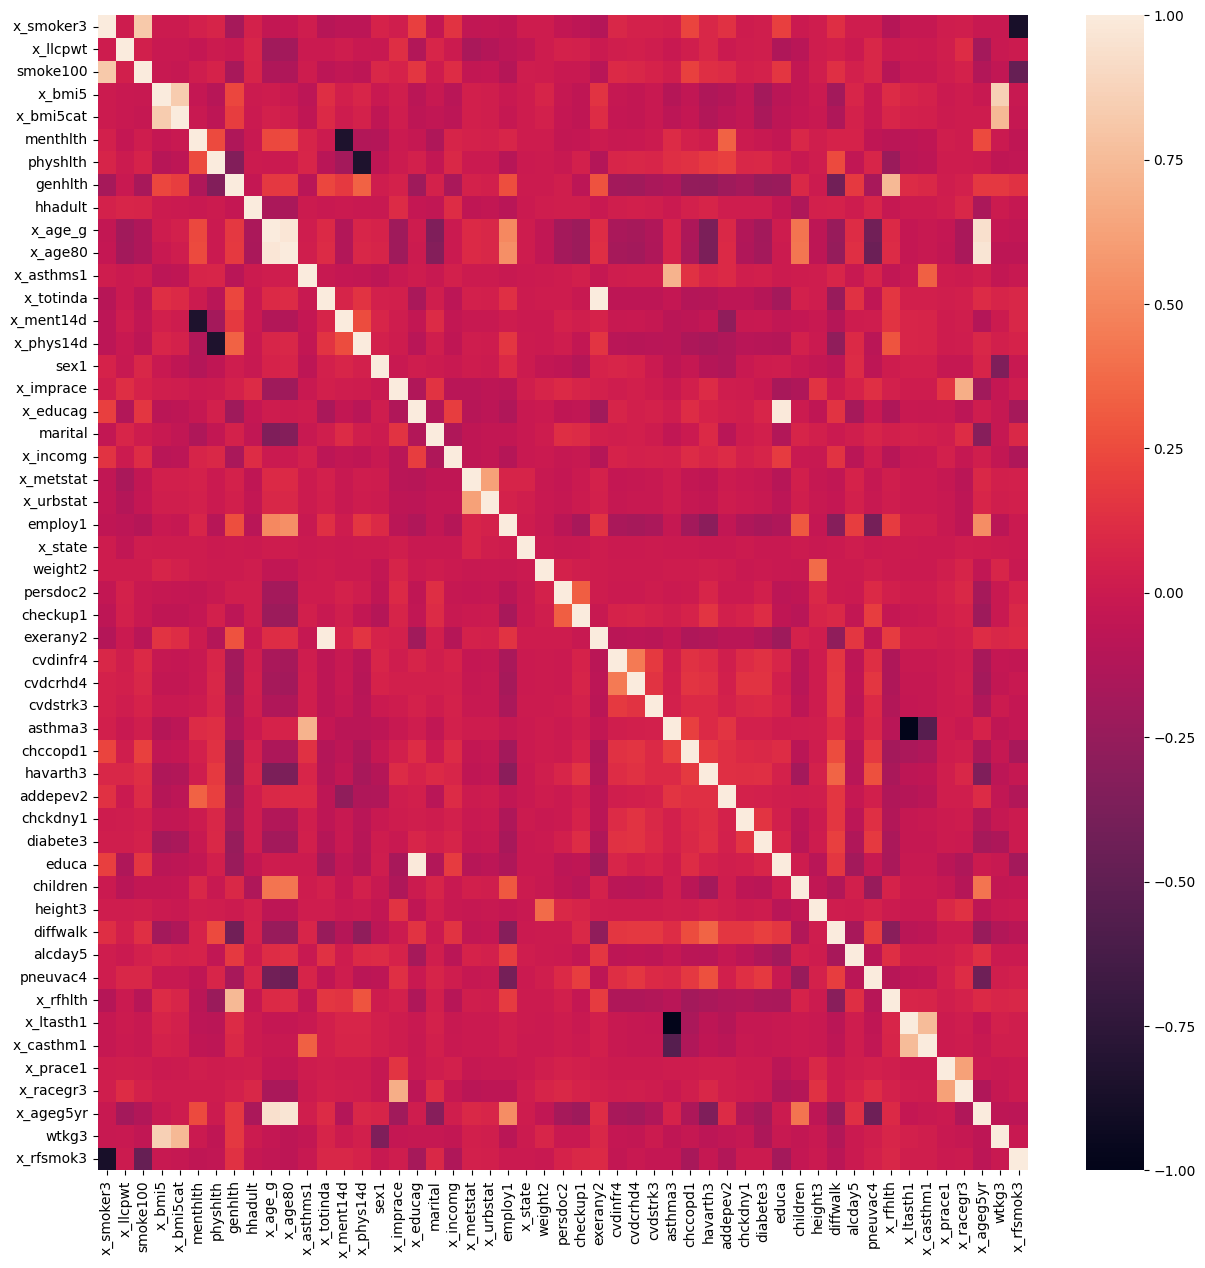

In [44]:
correlation = df[res_na.index].corr()

plt.figure(figsize=(15,15))
sns.heatmap(df[res_na.index].corr())
plt.show()


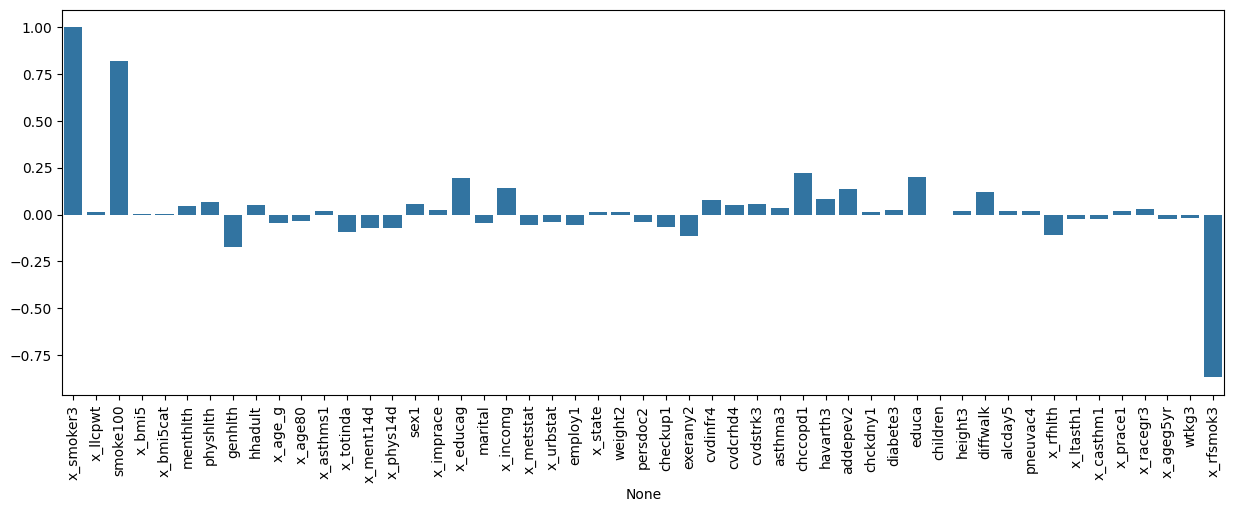

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_smoker3.values, x=correlation.x_smoker3.index)
plt.xticks(rotation=90)
plt.show()


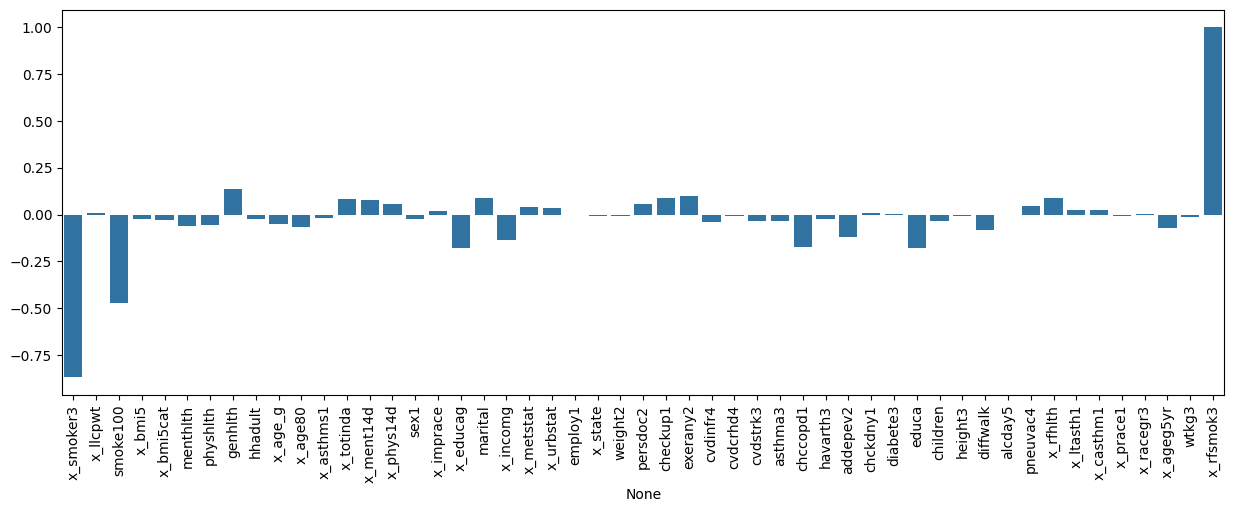

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_rfsmok3.values, x=correlation.x_rfsmok3.index)
plt.xticks(rotation=90)
plt.show()


In [47]:
# from res_na

numerical_features = [
    'x_llcpwt','x_age80','x_bmi5','weight2','wtkg3','height3',
    'children','hhadult','alcday5','menthlth','physhlth','poorhlth'
]

categorical_features = [
    'smoke100','x_bmi5cat','genhlth','x_age_g','x_asthms1','x_ltasth1','x_casthm1',
    'x_totinda','exerany2','x_ment14d','x_phys14d','sex1','x_imprace','x_prace1','x_racegr3',
    'x_educag','educa','marital','x_incomg','x_metstat','x_urbstat','employ1','x_state',
    'persdoc2','checkup1','cvdinfr4','cvdcrhd4','cvdstrk3','asthma3','chccopd1','havarth3','addepev2',
    'chckdny1','diabete3','diffwalk','pneuvac4','x_rfhlth','x_rfsmok3','x_ageg5yr'
]

len(numerical_features+categorical_features)


51

In [48]:
categorical_features.remove("smoke100")
categorical_features.remove("x_rfsmok3")
numerical_features.remove("x_llcpwt")

len(numerical_features+categorical_features)


48

In [49]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),                # پر کردن مقادیر گمشده عددی با میانگین
    ('scaler', StandardScaler())                                # مقیاس‌بندی ویژگی‌های عددی
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),       # پر کردن مقادیر گمشده متنی/منطقی با مد (پرتکرارترین)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)


In [50]:
df2018_without_4_smoker3 = df.copy()

df2018_without_4_smoker3['x_smoker3'].replace(4, np.nan, inplace=True)

df2018_without_4_smoker3.dropna(subset=['x_smoker3'], inplace=True)

df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].astype(int)
mapping_dict = {
    1: 0,
    2: 0,
    3: 1
}
df2018_without_4_smoker3['x_smoker3'] = df2018_without_4_smoker3['x_smoker3'].map(mapping_dict)

df2018_without_4_smoker3['x_smoker3'].value_counts()


,count
x_smoker3,
1,113247
0,53832


In [51]:
X = df2018_without_4_smoker3[numerical_features+categorical_features]
y = df2018_without_4_smoker3["x_smoker3"]


In [52]:
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]
scale_pos_weight


np.float64(0.47535034040636837)

In [53]:
X_processed = preprocessor.fit_transform(X)
print(f"\nShape of data after preprocessing: {X_processed.shape}")

feature_names_processed = preprocessor.get_feature_names_out()
print(f"Number of features after preprocessing: {len(feature_names_processed)}")

feature_names_processed



Shape of data after preprocessing: (167079, 48)
Number of features after preprocessing: 48


array(['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3',
       'num__height3', 'num__children', 'num__hhadult', 'num__alcday5',
       'num__menthlth', 'num__physhlth', 'num__poorhlth',
       'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1',
       'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda',
       'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1',
       'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3',
       'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg',
       'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state',
       'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4',
       'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3',
       'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk',
       'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr'], dtype=object)

In [54]:
X_processed_df = pd.DataFrame(X_processed, columns=numerical_features+categorical_features)


In [55]:
weights = df2018_without_4_smoker3["x_llcpwt"]


## Feature Engineering

In [56]:
# Define the full pipeline for preprocessing + feature selection
k=30
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=f_classif, k=k))       # Select top K best features
])

feature_selection_pipeline.fit(X, y)

# Get the scores for each feature
feature_scores = feature_selection_pipeline.named_steps['selector'].scores_

numerical_feature_names = numerical_features
# Get one-hot encoded feature names
onehot_features = feature_selection_pipeline.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names_onehot = onehot_features.get_feature_names_out(categorical_features)

# Combine all processed feature names
all_processed_feature_names = list(numerical_feature_names) + list(categorical_feature_names_onehot)

feature_scores_series = pd.Series(feature_scores, index=all_processed_feature_names)
sorted_features = feature_scores_series.sort_values(ascending=False)
selected_features_names = sorted_features.head(feature_selection_pipeline.named_steps['selector'].k).index.tolist()

print(f"Method used for Feature Selection: SelectKBest with f_classif (selecting top {feature_selection_pipeline.named_steps['selector'].k} features)")
print("\nTop features based on f_classif score:")
print(sorted_features.head(30))

print(f"\nSelected {feature_selection_pipeline.named_steps['selector'].k} Features:")
print(selected_features_names)


Method used for Feature Selection: SelectKBest with f_classif (selecting top 30 features)

Top features based on f_classif score:
x_age80      11328.311594
x_ageg5yr    11122.875219
x_age_g       9207.493099
educa         6390.848315
x_educag      5919.460400
marital       5063.541984
x_incomg      3473.480931
checkup1      3388.343056
pneuvac4      3237.454300
addepev2      2164.838067
genhlth       1735.579989
children      1601.577147
chccopd1      1588.061971
exerany2      1550.831792
x_ment14d     1520.378006
menthlth      1457.281413
employ1       1381.599685
persdoc2      1303.047383
x_imprace     1099.193741
x_totinda     1054.814298
x_bmi5cat      872.770175
wtkg3          683.401924
x_rfhlth       673.773712
havarth3       538.840273
x_bmi5         492.284667
x_racegr3      474.521681
physhlth       389.453436
cvdcrhd4       375.667728
diabete3       337.600749
x_phys14d      326.450848
dtype: float64

Selected 30 Features:
['x_age80', 'x_ageg5yr', 'x_age_g', 'educa', 'x_educ

Method 2: Recursive Feature Elimination (RFE)

In [57]:
# Initialize RFE. Select a base estimator and specify the number of features to select.
rfe_selector = RFE(estimator=LogisticRegression(random_state=42, max_iter=200), n_features_to_select=7)

# Fit RFE on the processed data (X_processed) and the target (y)
rfe_selector.fit(X_processed, y)

# Get the boolean mask of selected features and their ranking
selected_features_mask_rfe = rfe_selector.support_
feature_ranking_rfe = rfe_selector.ranking_

# Get the names of the selected features based on the mask
selected_features_names_rfe = feature_names_processed[selected_features_mask_rfe].tolist()

print("Selected features by RFE:")
print(selected_features_names_rfe)


Selected features by RFE:
['num__x_age80', 'num__wtkg3', 'cat__x_age_g', 'cat__exerany2', 'cat__educa', 'cat__chccopd1', 'cat__addepev2']


Method 3: Feature Importance from RandomForestClassifier

In [58]:
rf_model_for_importance = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the processed data (X_processed) and the target (y)
rf_model_for_importance.fit(X_processed, y, sample_weight=weights)

# Get the feature importances from the fitted model
feature_importances_rf = rf_model_for_importance.feature_importances_

feature_importances_series_rf = pd.Series(feature_importances_rf, index=feature_names_processed)
sorted_feature_importances_rf = feature_importances_series_rf.sort_values(ascending=False)

print("Top features based on RandomForest feature importance:")
print(sorted_feature_importances_rf.head(20))

top_k_features_names_rf = sorted_feature_importances_rf.head(20).index.tolist()

print(f"\nTop 20 feature names selected by RandomForest importance:")
print(top_k_features_names_rf)


Top features based on RandomForest feature importance:
num__x_age80      0.070481
num__x_bmi5       0.066308
cat__x_state      0.057030
num__weight2      0.053446
num__wtkg3        0.052532
num__height3      0.046320
cat__x_incomg     0.043700
cat__x_ageg5yr    0.043486
num__alcday5      0.037086
cat__marital      0.033272
num__hhadult      0.027129
cat__x_age_g      0.025730
cat__x_educag     0.025694
num__menthlth     0.025065
num__poorhlth     0.024997
cat__educa        0.024477
cat__genhlth      0.024163
cat__employ1      0.023498
num__physhlth     0.022109
cat__persdoc2     0.019498
dtype: float64

Top 20 feature names selected by RandomForest importance:
['num__x_age80', 'num__x_bmi5', 'cat__x_state', 'num__weight2', 'num__wtkg3', 'num__height3', 'cat__x_incomg', 'cat__x_ageg5yr', 'num__alcday5', 'cat__marital', 'num__hhadult', 'cat__x_age_g', 'cat__x_educag', 'num__menthlth', 'num__poorhlth', 'cat__educa', 'cat__genhlth', 'cat__employ1', 'num__physhlth', 'cat__persdoc2']


In [59]:
sorted_feature_importances_rf


,0
num__x_age80,0.070481
num__x_bmi5,0.066308
cat__x_state,0.057030
num__weight2,0.053446
num__wtkg3,0.052532
num__height3,0.046320
cat__x_incomg,0.043700
cat__x_ageg5yr,0.043486
num__alcday5,0.037086
cat__marital,0.033272


Variance Threshold

In [60]:
selector_vt = VarianceThreshold(threshold=0.5)

selected_features_mask_vt = selector_vt.fit(X_processed).get_support()
selected_features_names_vt = feature_names_processed[selected_features_mask_vt].tolist()

print(f"تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: {len(selected_features_names_vt)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_vt)


تعداد ویژگی‌های انتخاب شده توسط Variance Threshold: 30
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_casthm1', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__employ1', 'cat__x_state', 'cat__checkup1', 'cat__diabete3', 'cat__x_ageg5yr']


۲. Correlation Matrix (ماتریس همبستگی)
این روش برای کاهش همخطی چندگانه (Multicollinearity) استفاده می‌شود. ویژگی‌هایی که همبستگی بسیار بالایی با یکدیگر دارند را شناسایی و یکی از آن‌ها را حذف می‌کند. این کار به پایداری و تفسیرپذیری مدل‌های خطی کمک می‌کند.

In [61]:
# محاسبه ماتریس همبستگی. abs() برای در نظر گرفتن همبستگی مثبت و منفی.
corr_matrix = X_processed_df.corr().abs()

# انتخاب مثلث بالایی ماتریس همبستگی برای جلوگیری از تکرار و مقادیر روی قطر اصلی
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 0.9 یک آستانه رایج است، می‌توانید آن را تغییر دهید.
to_drop_high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# ویژگی‌های باقی‌مانده (انتخاب‌شده)
selected_features_names_corr = [col for col in feature_names_processed if col not in to_drop_high_corr]

print(f"ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): {to_drop_high_corr}")
print(f"تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: {len(selected_features_names_corr)}")
print("ویژگی‌های انتخاب شده:")
print(selected_features_names_corr)


ویژگی‌های حذف شده به دلیل همبستگی بالا (>0.9): ['x_age_g', 'educa', 'x_ageg5yr']
تعداد ویژگی‌های انتخاب شده بعد از حذف همبستگی بالا: 48
ویژگی‌های انتخاب شده:
['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3', 'num__height3', 'num__children', 'num__hhadult', 'num__alcday5', 'num__menthlth', 'num__physhlth', 'num__poorhlth', 'cat__x_bmi5cat', 'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_ltasth1', 'cat__x_casthm1', 'cat__x_totinda', 'cat__exerany2', 'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1', 'cat__x_imprace', 'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa', 'cat__marital', 'cat__x_incomg', 'cat__x_metstat', 'cat__x_urbstat', 'cat__employ1', 'cat__x_state', 'cat__persdoc2', 'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4', 'cat__cvdstrk3', 'cat__asthma3', 'cat__chccopd1', 'cat__havarth3', 'cat__addepev2', 'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk', 'cat__pneuvac4', 'cat__x_rfhlth', 'cat__x_ageg5yr']


### VIF Method

In [62]:
# def calculate_vif(df_features):
#     variables = df_features.copy()
#     threshold = 5.0

#     while True:
#         vif_df = pd.DataFrame()
#         vif_df["Feature"] = variables.columns

#         vif_df["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#         max_vif = vif_df["VIF"].max()

#         if max_vif > threshold:
#             feature_with_max_vif = vif_df.sort_values(by="VIF", ascending=False).iloc[0]["Feature"]
#             print(f"remove feature'{feature_with_max_vif}' with VIF = {max_vif:.2f}")

#             variables = variables.drop(columns=[feature_with_max_vif])
#         else:
#             print(f"can't find any feature with vif bigger than {threshold}")
#             break

#     print("\n End of vif removing features process")
#     print(vif_df.sort_values(by="VIF", ascending=False))
#     return variables.columns.tolist()

# selected_features_vif = calculate_vif(X_processed_df)
# print(f"\nselected features with VIF method:")
# print(selected_features_vif)
# X_vif_selected = X_processed_df[selected_features_vif]


In [63]:
vif_less_than_7 = ['x_age80', 'x_bmi5', 'weight2', 'wtkg3', 'height3', 'children', 'hhadult', 'alcday5', 'menthlth', 'physhlth', 'poorhlth', 'x_casthm1', 'x_totinda', 'x_ment14d', 'x_phys14d', 'x_imprace', 'x_prace1', 'marital', 'x_incomg', 'employ1', 'x_state', 'persdoc2', 'checkup1', 'x_rfhlth']
X_processed_df_vif = X_processed_df[vif_less_than_7]
X_processed_df_vif.shape


(167079, 24)

In [64]:
numerical_features_selected = [f for f in vif_less_than_7 if f in numerical_features]
categorical_features_selected = [f for f in vif_less_than_7 if f in categorical_features]

preprocessor_vif = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features_selected),
        ('cat', categorical_pipeline, categorical_features_selected)
    ],
    remainder='passthrough'
)

X_vif = df2018_without_4_smoker3[vif_less_than_7]


مدل‌های مبتنی بر درخت مانند Random Forest، XGBoost و LightGBM به هم‌خطی (Multicollinearity) حساسیت بسیار کمی دارند.

#### منحنی Precision-Recall

برای داده‌های نامتوازن، این نمودار اغلب آموزنده‌تر از ROC است، چون بر عملکرد مدل روی کلاس اقلیت (در اینجا، سیگاری‌های سابق) تمرکز می‌کند.

Precision: از بین تمام کسانی که مدل گفته "ترک کرده‌اند"، چند درصدشان واقعاً ترک کرده بودند؟

Recall: از بین تمام کسانی که واقعاً ترک کرده‌اند، مدل توانسته چند درصدشان را شناسایی کند؟

#### منحنی AUC-ROC

این منحنی، نرخ True Positive Rate (Recall) را در مقابل نرخ False Positive Rate در آستانه‌های مختلف طبقه‌بندی رسم می‌کند.

عملکرد ایده‌آل: منحنی‌ای که به گوشه بالا-چپ نزدیک‌تر است.

مقدار AUC: سطح زیر این منحنی. عددی بین ۰.۵ (مدل تصادفی) و ۱.۰ (مدل کامل). هر چه به ۱ نزدیک‌تر باشد، بهتر است.

# White/Black box models on VIF/ALL features

In [65]:
def run_full_analysis(model_name, model_constructor_func, preprocessor_instance, X_data, y_data, weights_data):
    model_instance = model_constructor_func()

    # split data
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_data)
    target_names_original = le.inverse_transform(np.unique(y_encoded)).astype(str)
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X_data, y_encoded, weights_data, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # pipline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor_instance),
        ('classifier', model_instance)
    ])

    print(f"\n===== Training model: {model_name} =====")
    start_time = time.time()
    if isinstance(model_instance, LDA):
        print("Model is LDA, fitting without sample_weight.")
        pipeline.fit(X_train, y_train)
    else:
        # other model train with weights
        pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
    training_time = time.time() - start_time


    # evaluate
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    print(f"Training completed in {training_time:.2f} seconds.")
    print(f"Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | AUC: {auc:.4f}")


    # Evaluation plots
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    fig.suptitle(f"Evaluation for {model_name}", fontsize=16)
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[0], cmap=plt.cm.Blues)
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[1])
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test, ax=axes[2])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


    # analysis for each model
    fitted_preprocessor = pipeline.named_steps['preprocessor']
    final_model = pipeline.named_steps['classifier']
    feature_names = fitted_preprocessor.get_feature_names_out()

    if isinstance(final_model, (LogisticRegression, LDA)):
        print("\n--- Coefficient Analysis ---")
        coefficients = final_model.coef_[0]
        feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
        if isinstance(final_model, LogisticRegression):
            feature_importance['Odds_Ratio'] = np.exp(coefficients)

        # sort by abs of coeff
        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        print(feature_importance.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient'))

    elif isinstance(final_model, DecisionTreeClassifier):
        print("\n--- Decision Tree Analysis ---")
        plt.figure(figsize=(40, 20))
        plot_tree(final_model, feature_names=feature_names, class_names=target_names_original,
                  filled=True, rounded=True, fontsize=7, max_depth=5)
        plt.title(f"Decision Tree for {model_name}")
        plt.show()

        # show tree conditions in text
        tree_rules = export_text(final_model, feature_names=list(feature_names))
        print("Tree Rules (first few levels):\n", "\n".join(tree_rules.splitlines()[:20]))

    elif isinstance(final_model, (xgb.XGBClassifier, lgb.LGBMClassifier, cb.CatBoostClassifier)):
        print(f"\n--- SHAP Analysis for {model_name} ---")
        X_test_transformed = fitted_preprocessor.transform(X_test)
        X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)
        explainer = shap.TreeExplainer(final_model)
        shap_values = explainer.shap_values(X_test_transformed_df)

        shap.summary_plot(shap_values, X_test_transformed_df, show=False)
        plt.title(f'SHAP Summary Plot - {model_name}')
        plt.show()

    return {'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': auc, 'Time (s)': training_time}

# models
models_to_run_full_suite = {
    # Boosting Models
    'XGBoost': lambda: xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42),
    'LightGBM': lambda: lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, random_state=42),
    'CatBoost': lambda: cb.CatBoostClassifier(scale_pos_weight=scale_pos_weight, random_state=42, verbose=0),

    # Classic & Interpretable Models
    'Logistic Regression': lambda: LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': lambda: DecisionTreeClassifier(max_depth=7, random_state=42, min_samples_split=20, min_samples_leaf=10),
    'LDA': lambda: LDA()
}

# store results
vif_results = []
all_features_results = []



Analysis with VIF Selected Features

===== Training model: XGBoost (VIF) =====
Training completed in 3.63 seconds.
Accuracy: 0.6862 | F1-Score: 0.6952 | AUC: 0.7480


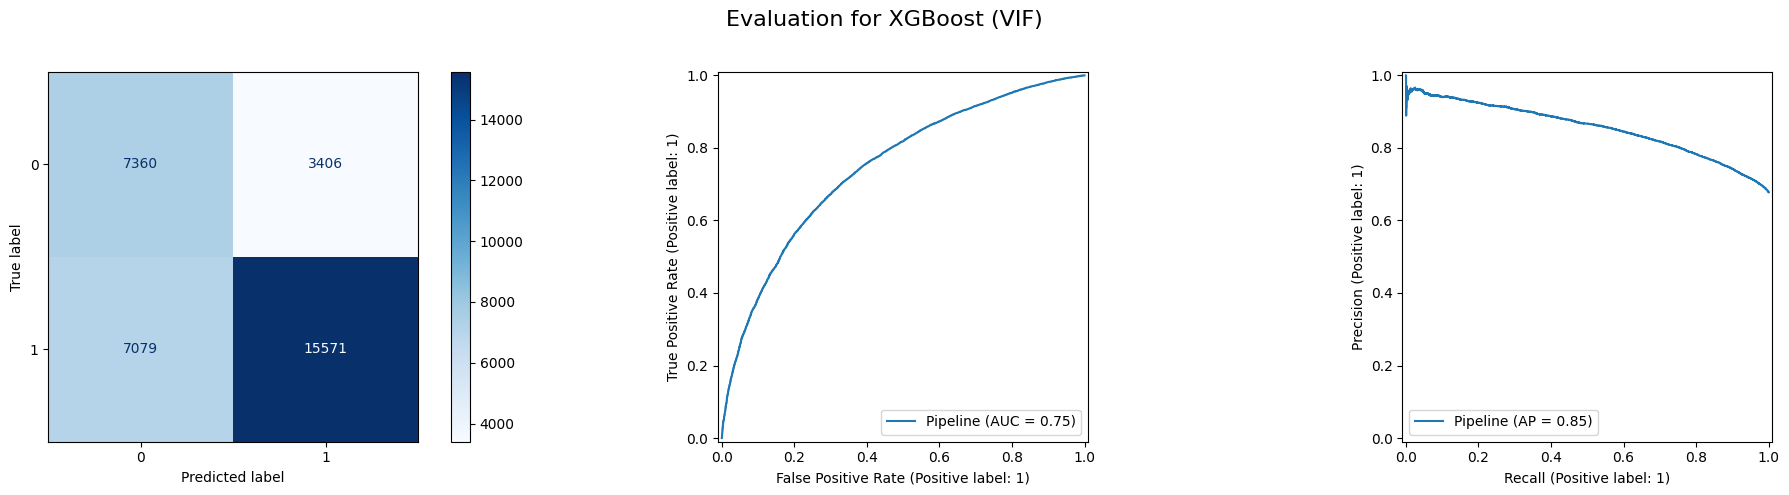


--- SHAP Analysis for XGBoost (VIF) ---


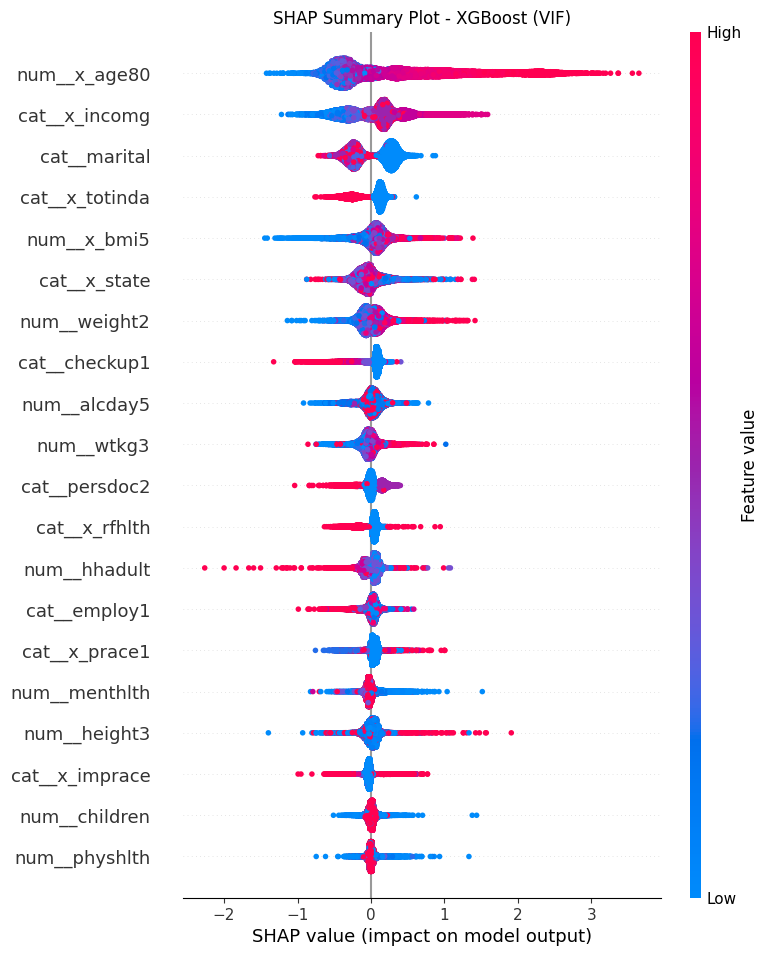


===== Training model: LightGBM (VIF) =====
[LightGBM] [Info] Number of positive: 90597, number of negative: 43066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1219
[LightGBM] [Info] Number of data points in the train set: 133663, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636651 -> initscore=0.560860
[LightGBM] [Info] Start training from score 0.560860
Training completed in 2.40 seconds.
Accuracy: 0.6853 | F1-Score: 0.6952 | AUC: 0.7610


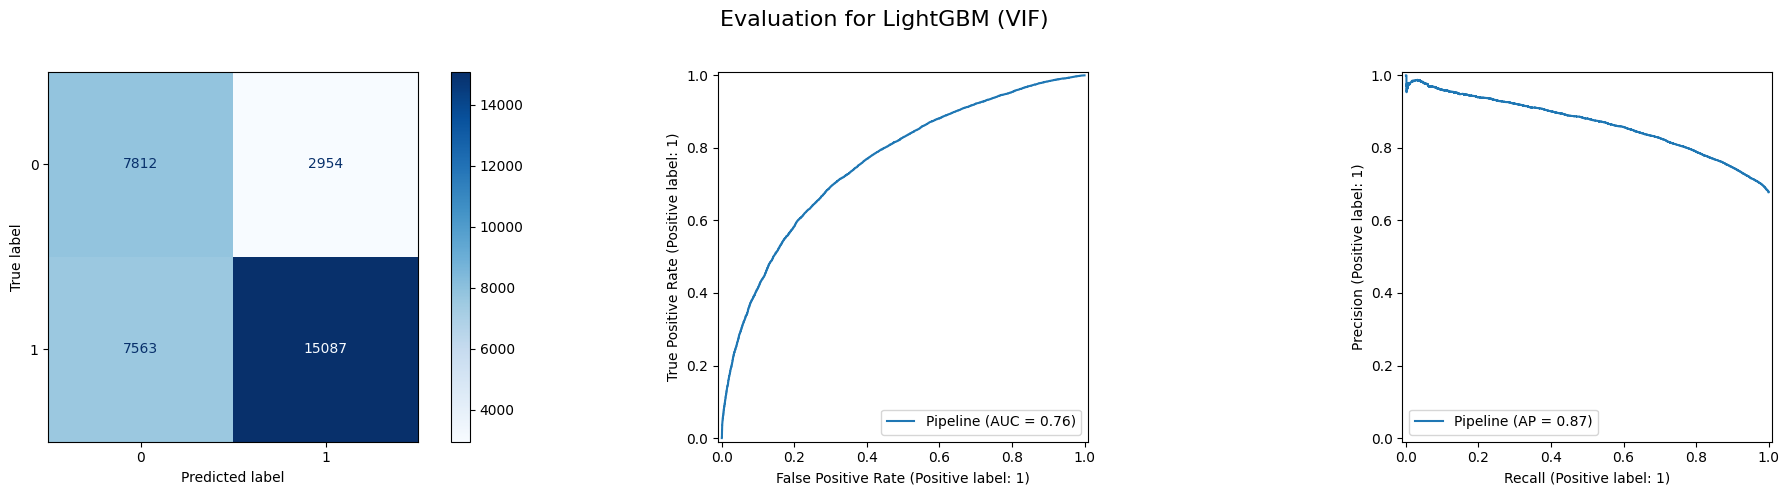


--- SHAP Analysis for LightGBM (VIF) ---


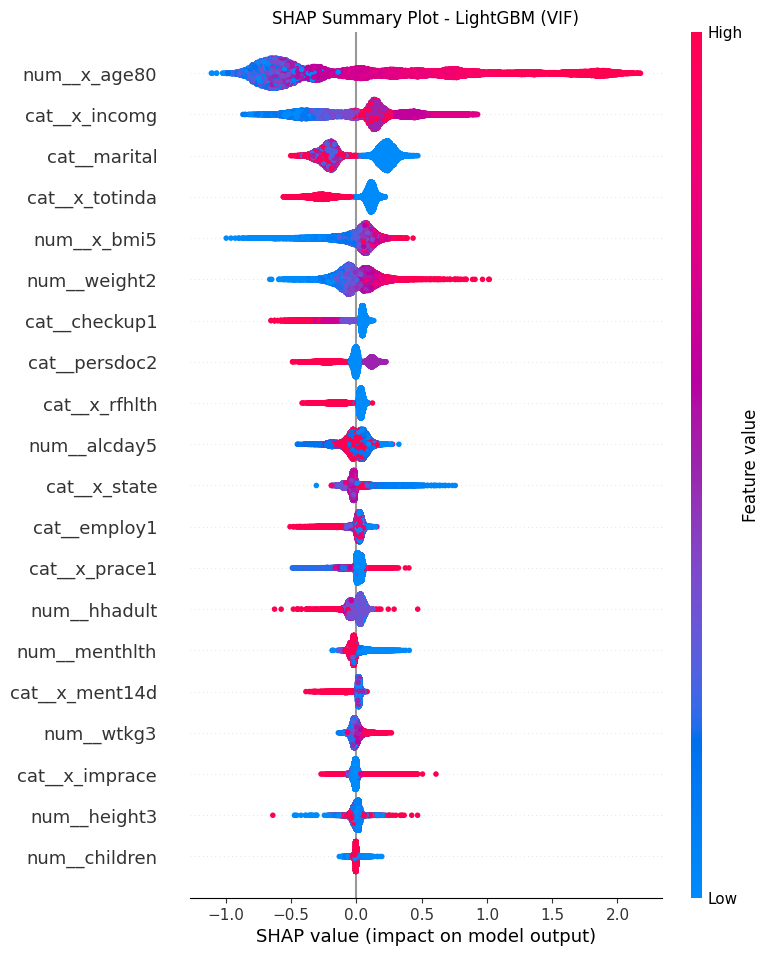


===== Training model: CatBoost (VIF) =====
Training completed in 43.63 seconds.
Accuracy: 0.6920 | F1-Score: 0.7012 | AUC: 0.7602


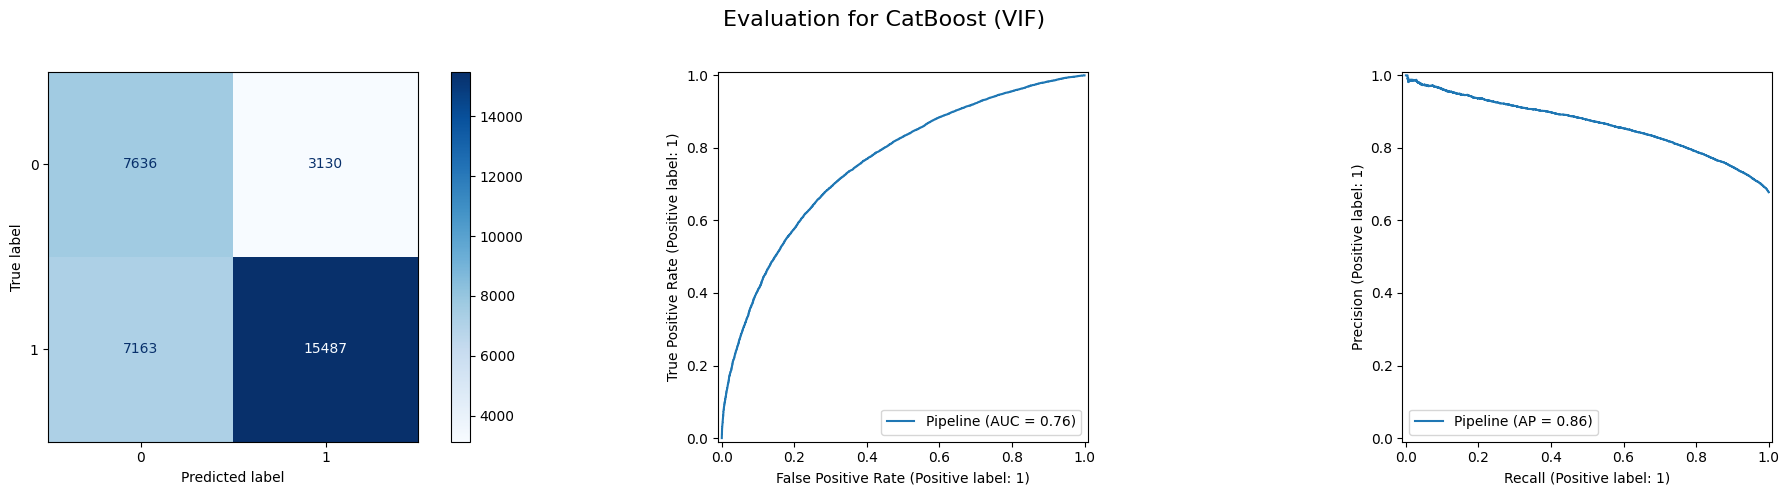


--- SHAP Analysis for CatBoost (VIF) ---


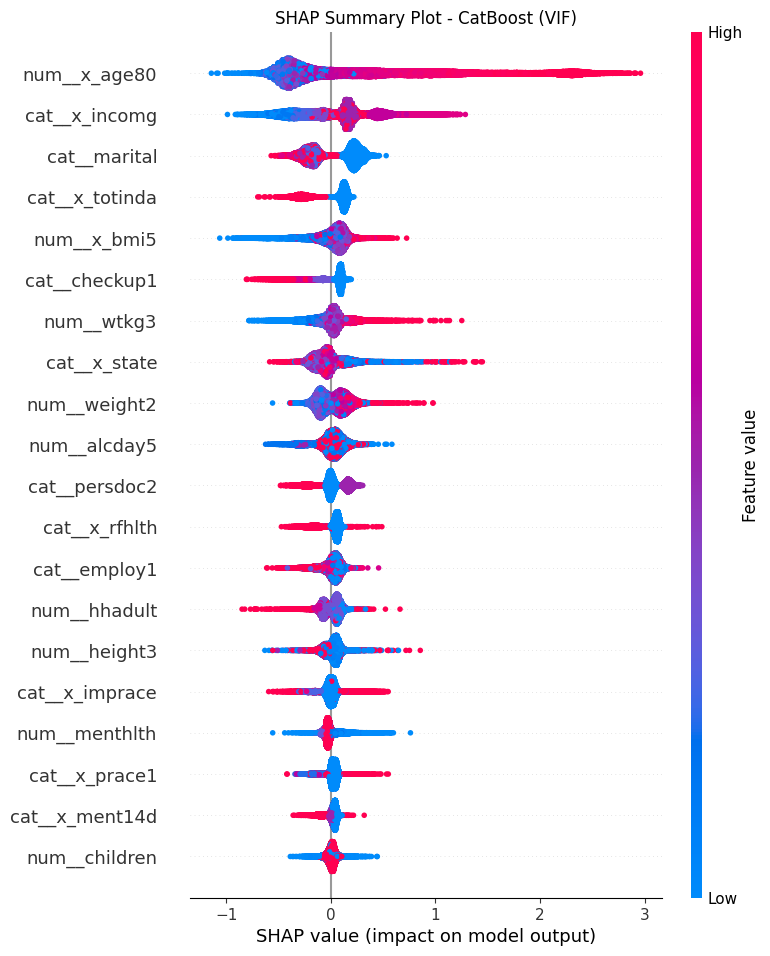


===== Training model: Logistic Regression (VIF) =====
Training completed in 10.95 seconds.
Accuracy: 0.6994 | F1-Score: 0.6590 | AUC: 0.7148


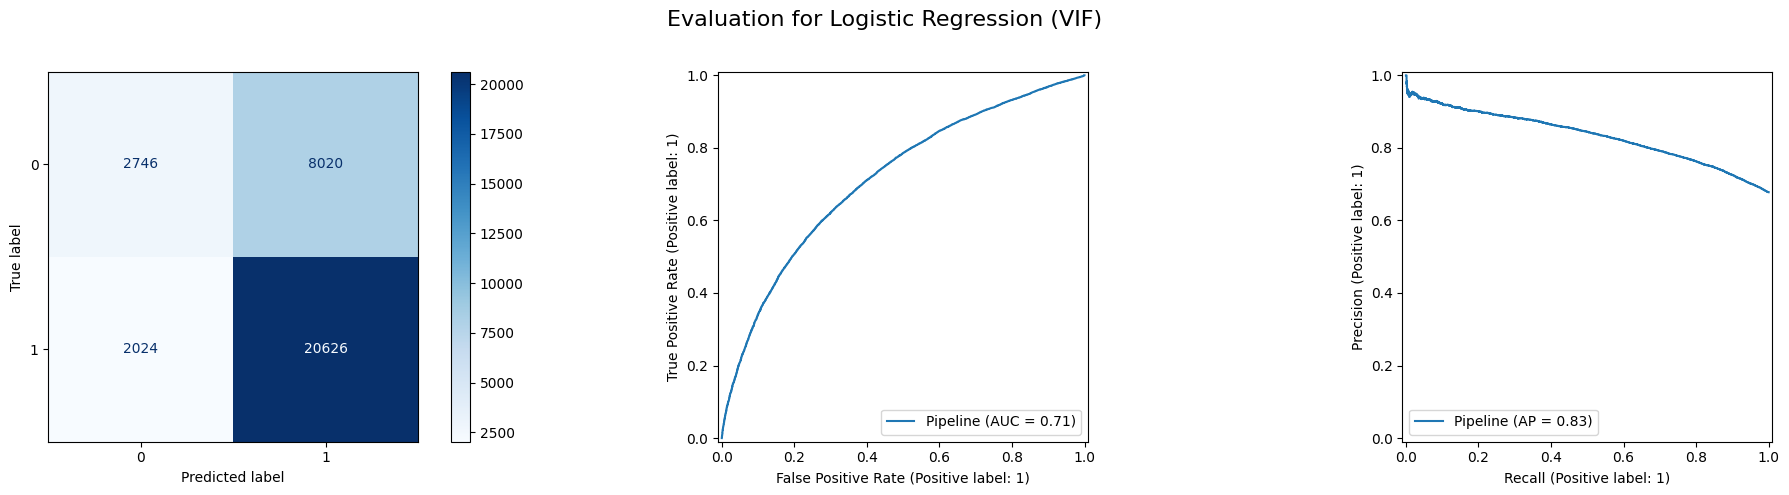


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.463424    1.589507
12  cat__x_totinda    -0.351517    0.703620
3       num__wtkg3     0.171790    1.187428
22   cat__checkup1    -0.160104    0.852055
23   cat__x_rfhlth    -0.155350    0.856115
18   cat__x_incomg     0.101577    1.106916
17    cat__marital    -0.095576    0.908849
13  cat__x_ment14d    -0.055334    0.946169
8    num__menthlth    -0.052502    0.948852
21   cat__persdoc2    -0.050712    0.950553
14  cat__x_phys14d    -0.035391    0.965228
11  cat__x_casthm1    -0.028828    0.971584
7     num__alcday5    -0.020601    0.979610
19    cat__employ1    -0.019731    0.980462
6     num__hhadult    -0.019012    0.981168
1      num__x_bmi5    -0.017768    0.982389
15  cat__x_imprace     0.016359    1.016493
5    num__children    -0.012448    0.987629
2     num__weight2     0.011421    1.011486
9    num__physhlth     0.010676    1.010733
10   num__poorhlth     0.009839    1.009887
4 

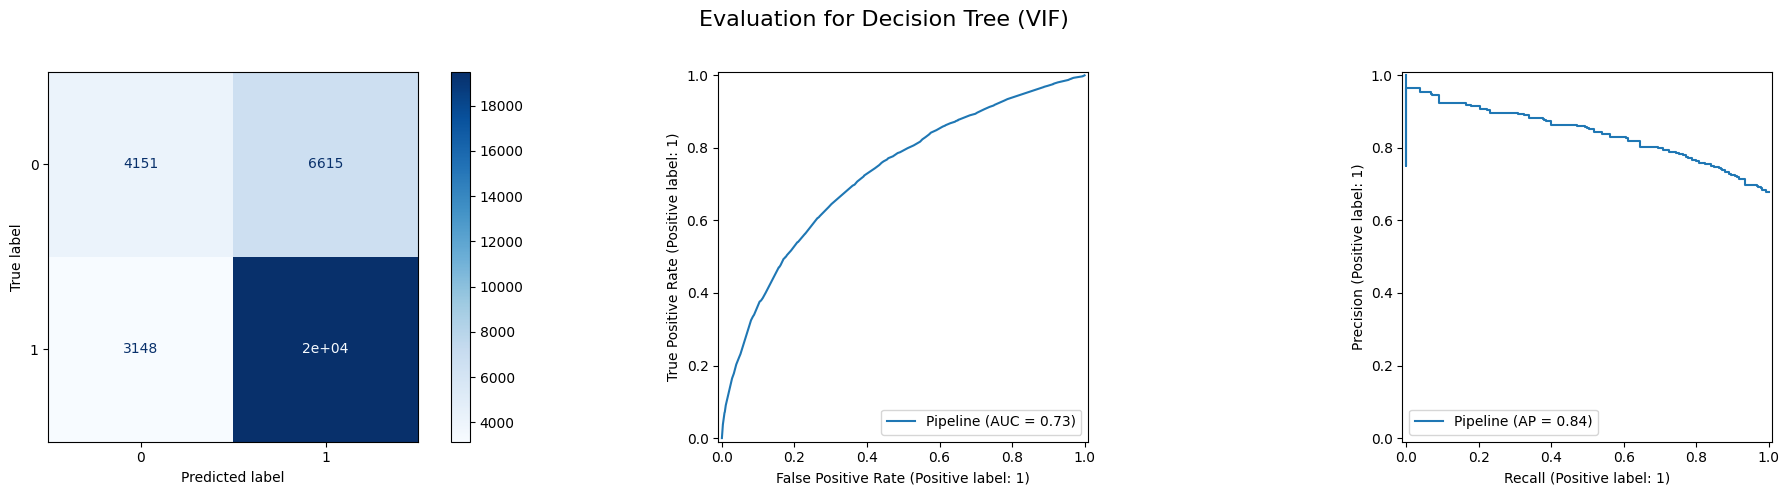


--- Decision Tree Analysis ---


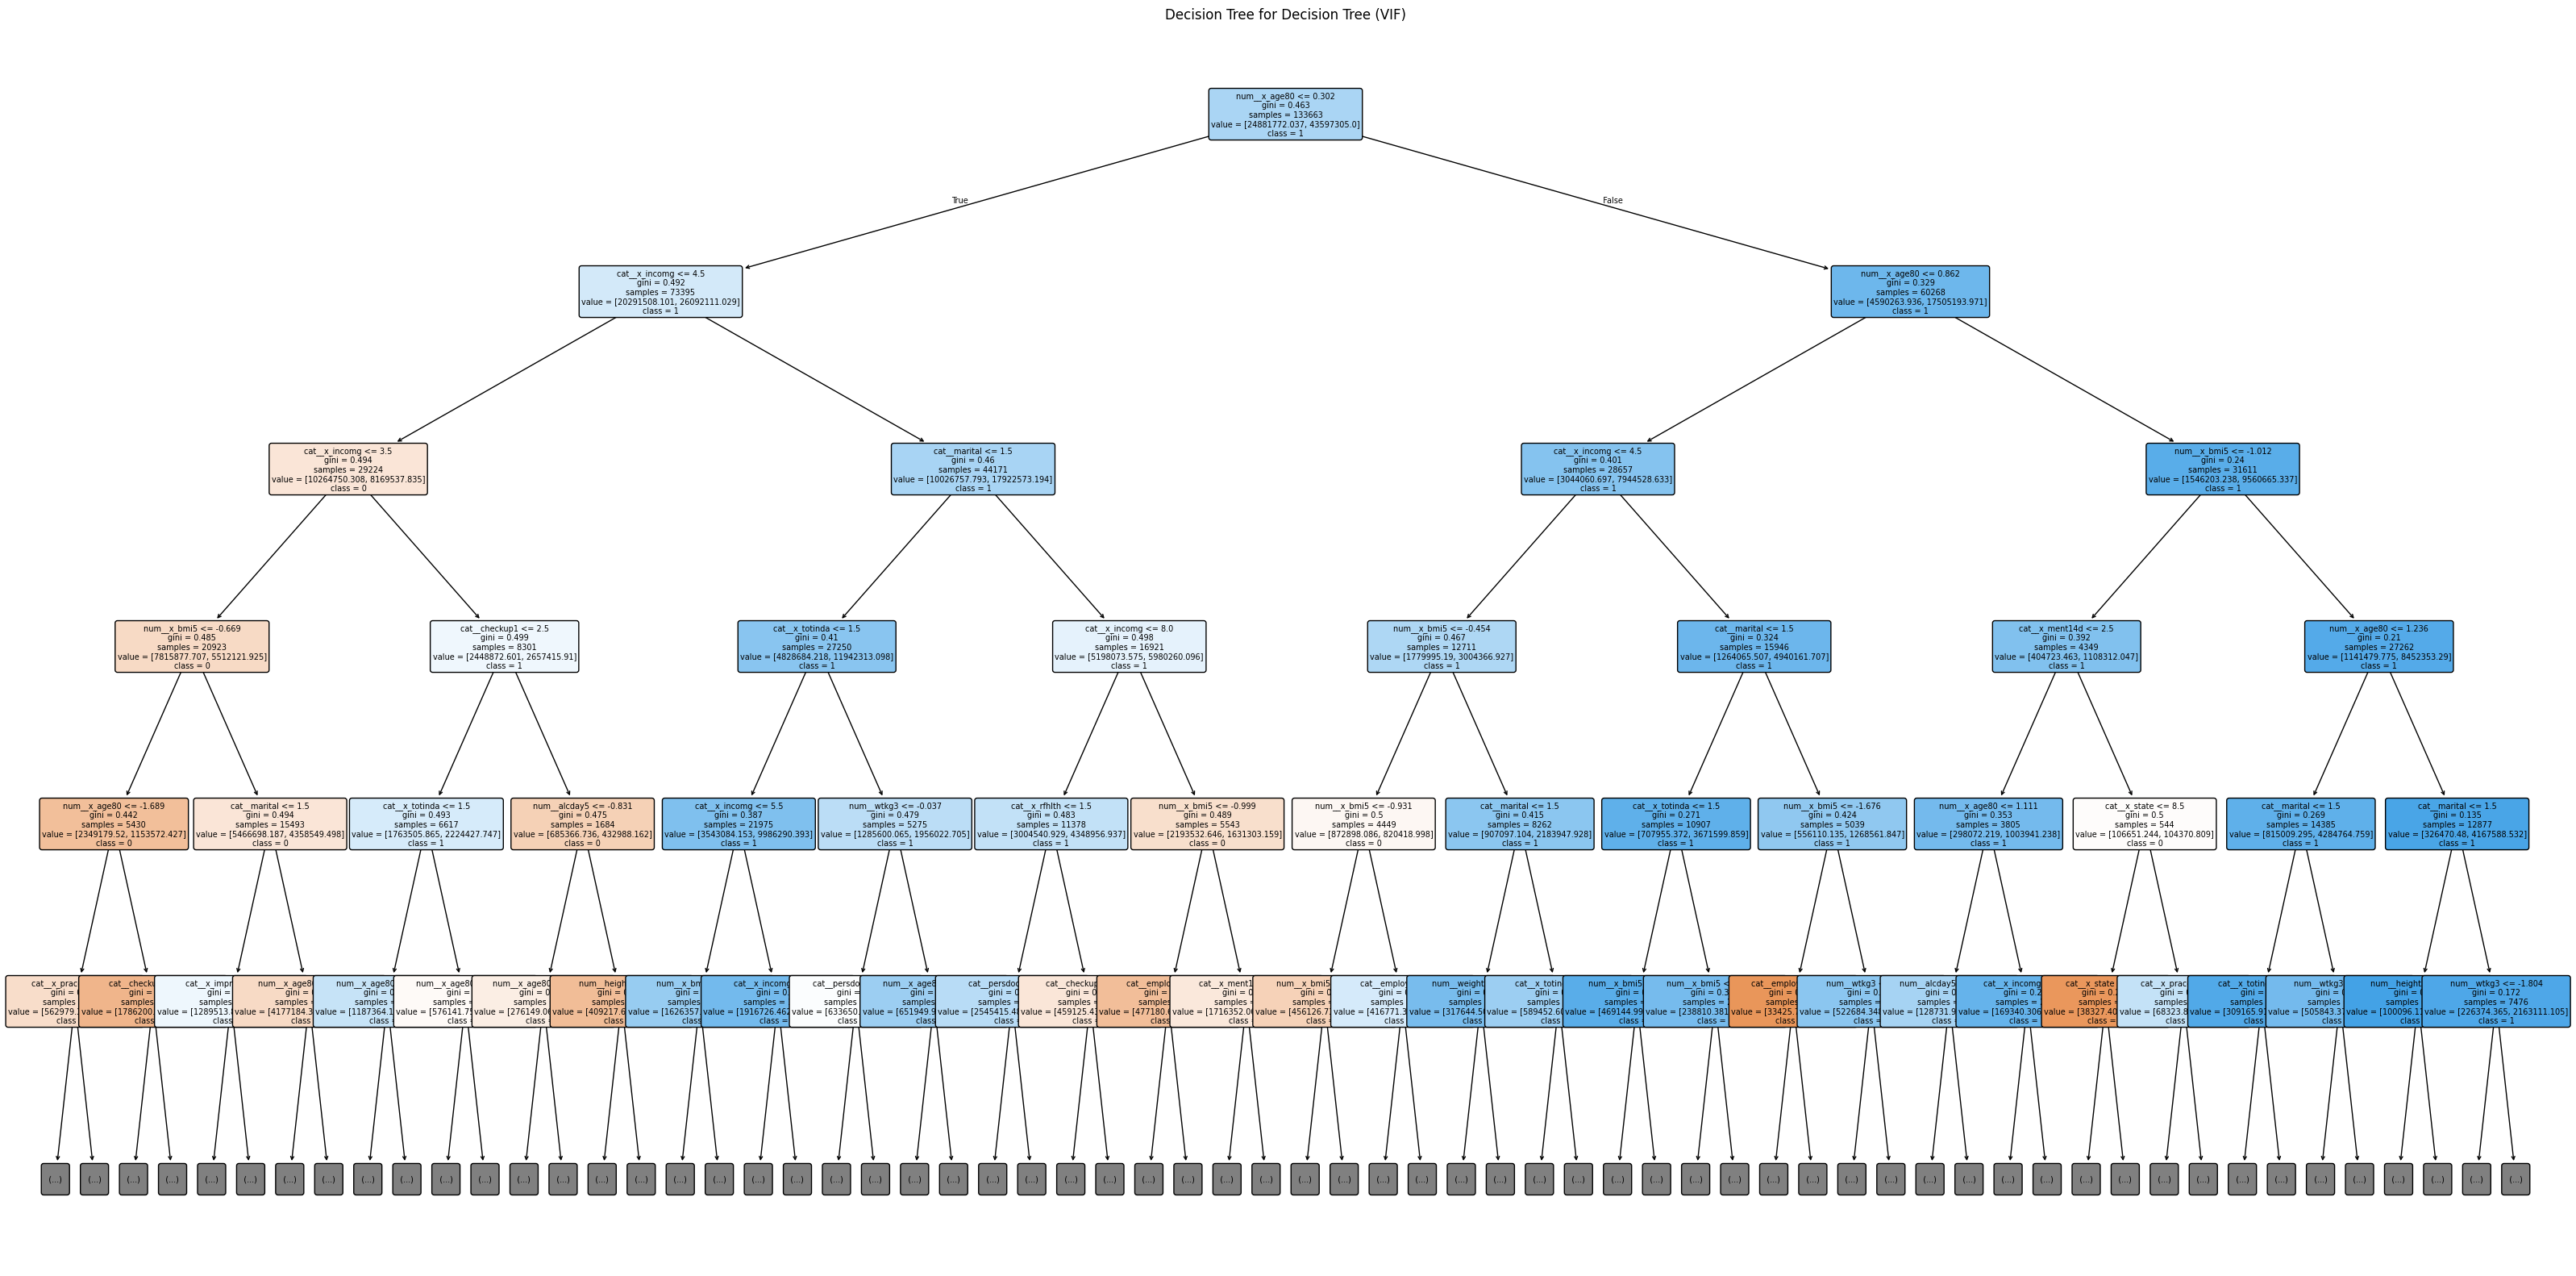

Tree Rules (first few levels):
 |--- num__x_age80 <= 0.30
|   |--- cat__x_incomg <= 4.50
|   |   |--- cat__x_incomg <= 3.50
|   |   |   |--- num__x_bmi5 <= -0.67
|   |   |   |   |--- num__x_age80 <= -1.69
|   |   |   |   |   |--- cat__x_prace1 <= 1.50
|   |   |   |   |   |   |--- num__x_bmi5 <= -0.76
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__x_bmi5 >  -0.76
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- cat__x_prace1 >  1.50
|   |   |   |   |   |   |--- num__height3 <= 0.10
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- num__height3 >  0.10
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- num__x_age80 >  -1.69
|   |   |   |   |   |--- cat__checkup1 <= 1.50
|   |   |   |   |   |   |--- cat__x_incomg <= 2.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cat__x_incomg >  2.50

===== Training model: LDA (VIF) =====
Model is LDA, fitting without sample_weight.
Training comple

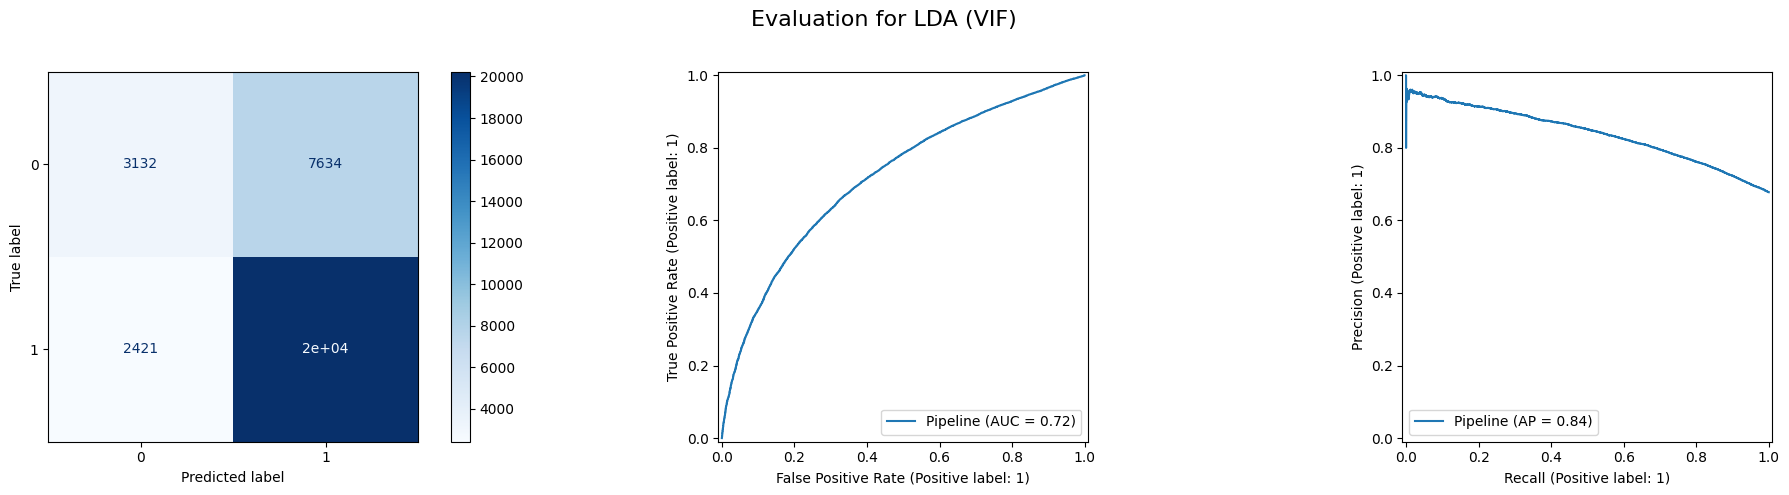


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     0.605352
12  cat__x_totinda    -0.344729
23   cat__x_rfhlth    -0.200679
3       num__wtkg3     0.196301
22   cat__checkup1    -0.193570
18   cat__x_incomg     0.109558
17    cat__marital    -0.101825
7     num__alcday5    -0.061863
13  cat__x_ment14d    -0.059173
1      num__x_bmi5     0.037879
14  cat__x_phys14d    -0.028011
15  cat__x_imprace    -0.027764
5    num__children    -0.025966
10   num__poorhlth     0.025226
8    num__menthlth    -0.023497
4     num__height3     0.023297
2     num__weight2     0.019780
6     num__hhadult    -0.019086
19    cat__employ1    -0.016869
9    num__physhlth     0.009382
11  cat__x_casthm1    -0.006962
21   cat__persdoc2    -0.005909
20    cat__x_state    -0.001081
16   cat__x_prace1     0.000145


In [66]:
# vif features
print("\nAnalysis with VIF Selected Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (VIF)", model_constructor, preprocessor_vif, X_vif, y, weights)
    vif_results.append(result)



Analysis with All Features

===== Training model: XGBoost (All Features) =====
Training completed in 2.90 seconds.
Accuracy: 0.7014 | F1-Score: 0.7096 | AUC: 0.7664


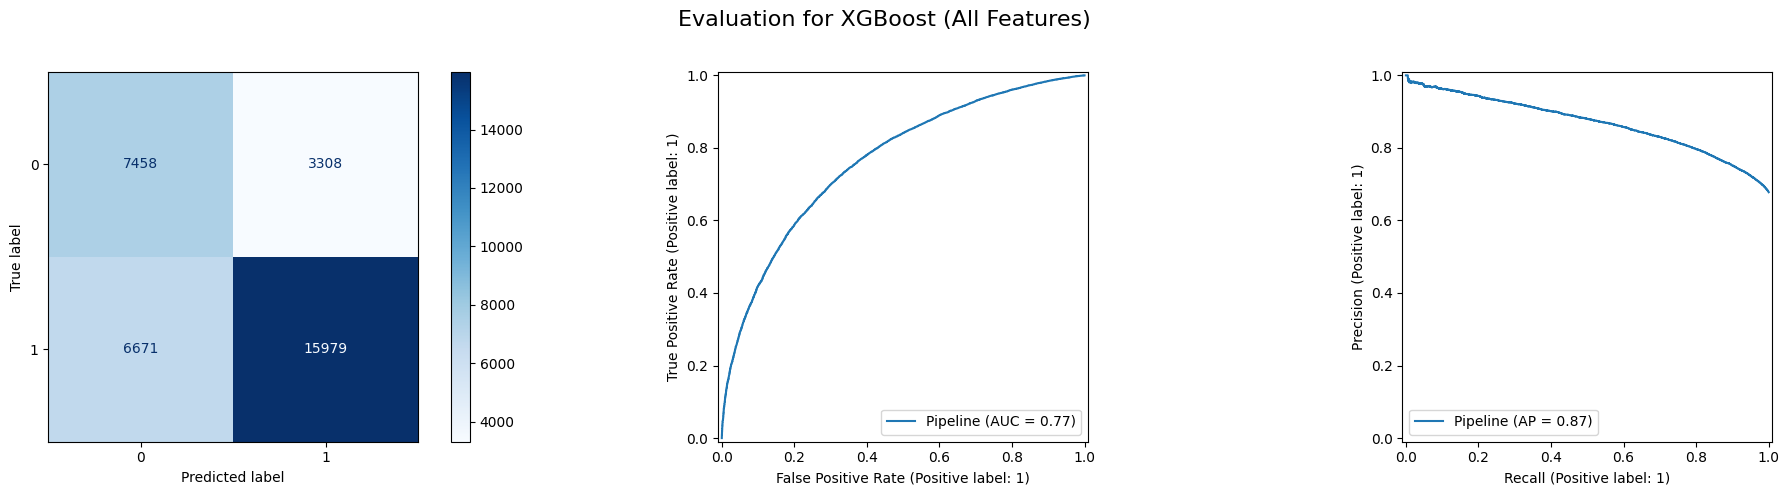


--- SHAP Analysis for XGBoost (All Features) ---


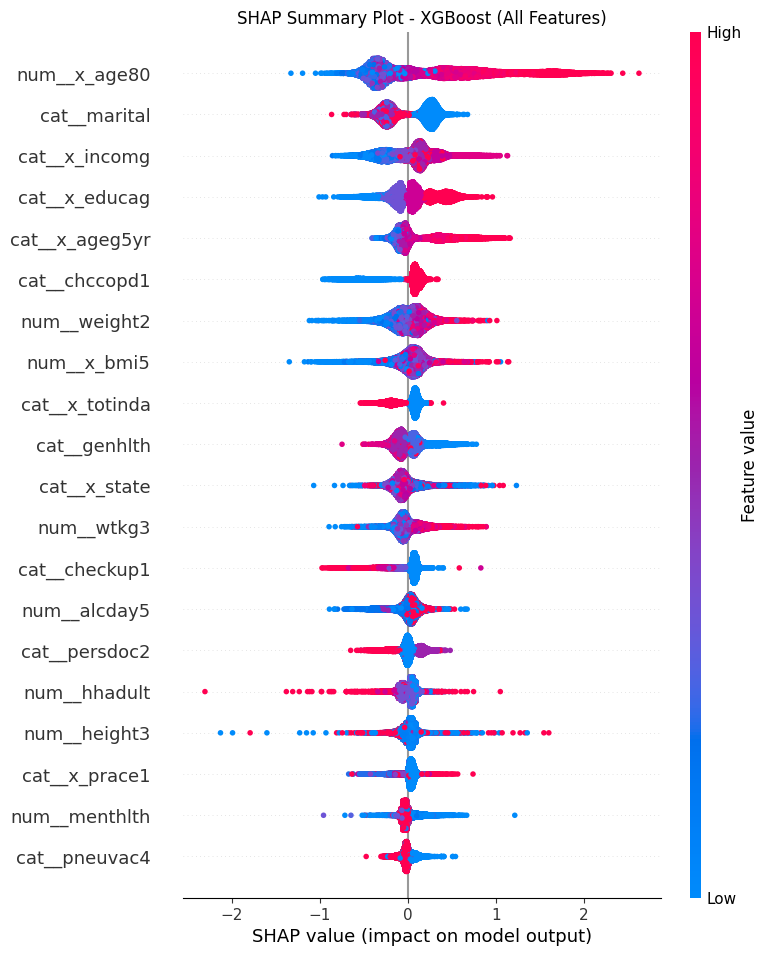


===== Training model: LightGBM (All Features) =====
[LightGBM] [Info] Number of positive: 90597, number of negative: 43066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 133663, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636651 -> initscore=0.560860
[LightGBM] [Info] Start training from score 0.560860
Training completed in 3.90 seconds.
Accuracy: 0.6994 | F1-Score: 0.7086 | AUC: 0.7767


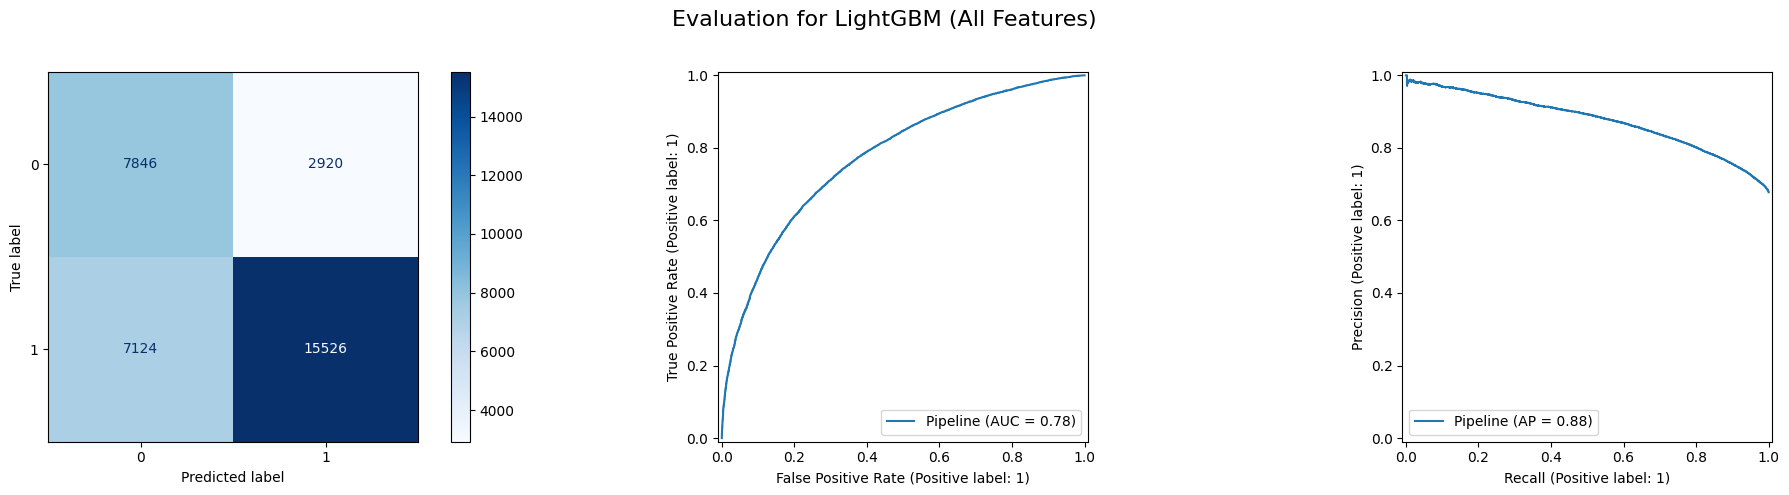


--- SHAP Analysis for LightGBM (All Features) ---


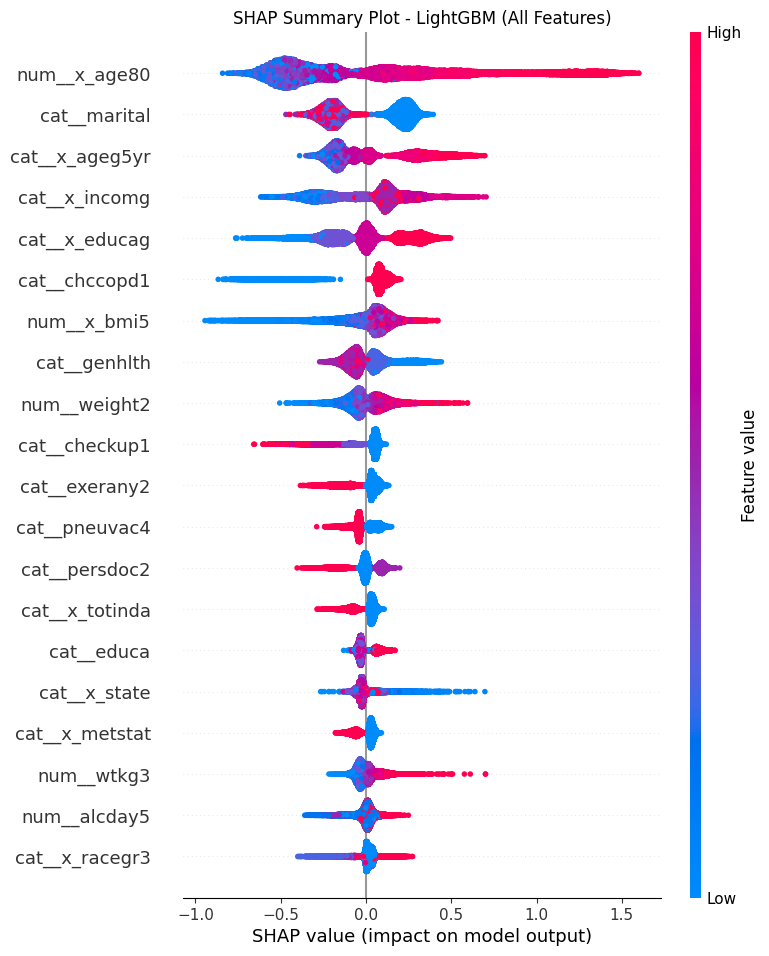


===== Training model: CatBoost (All Features) =====
Training completed in 48.63 seconds.
Accuracy: 0.7066 | F1-Score: 0.7148 | AUC: 0.7765


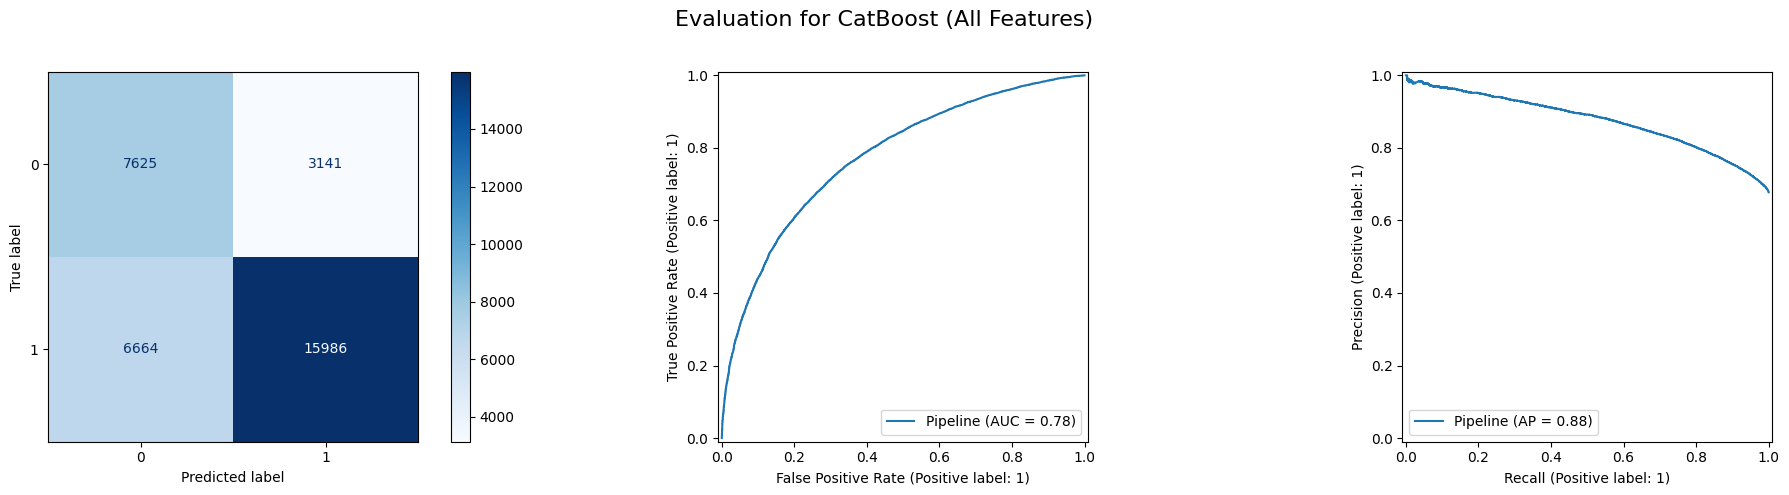


--- SHAP Analysis for CatBoost (All Features) ---


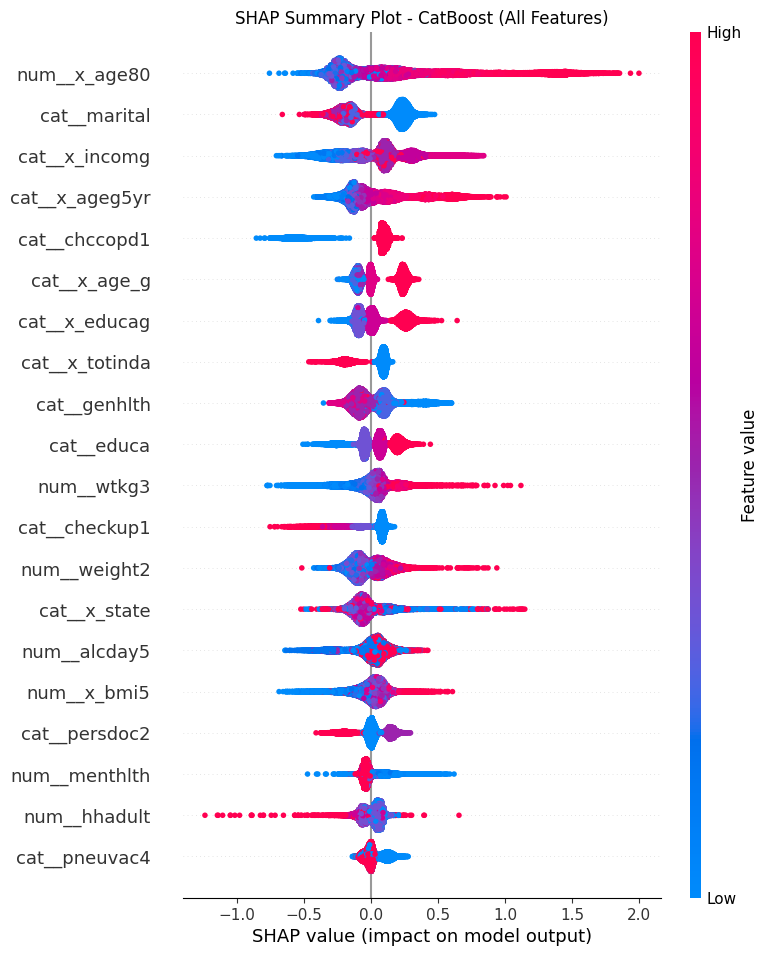


===== Training model: Logistic Regression (All Features) =====
Training completed in 32.59 seconds.
Accuracy: 0.7192 | F1-Score: 0.6930 | AUC: 0.7468


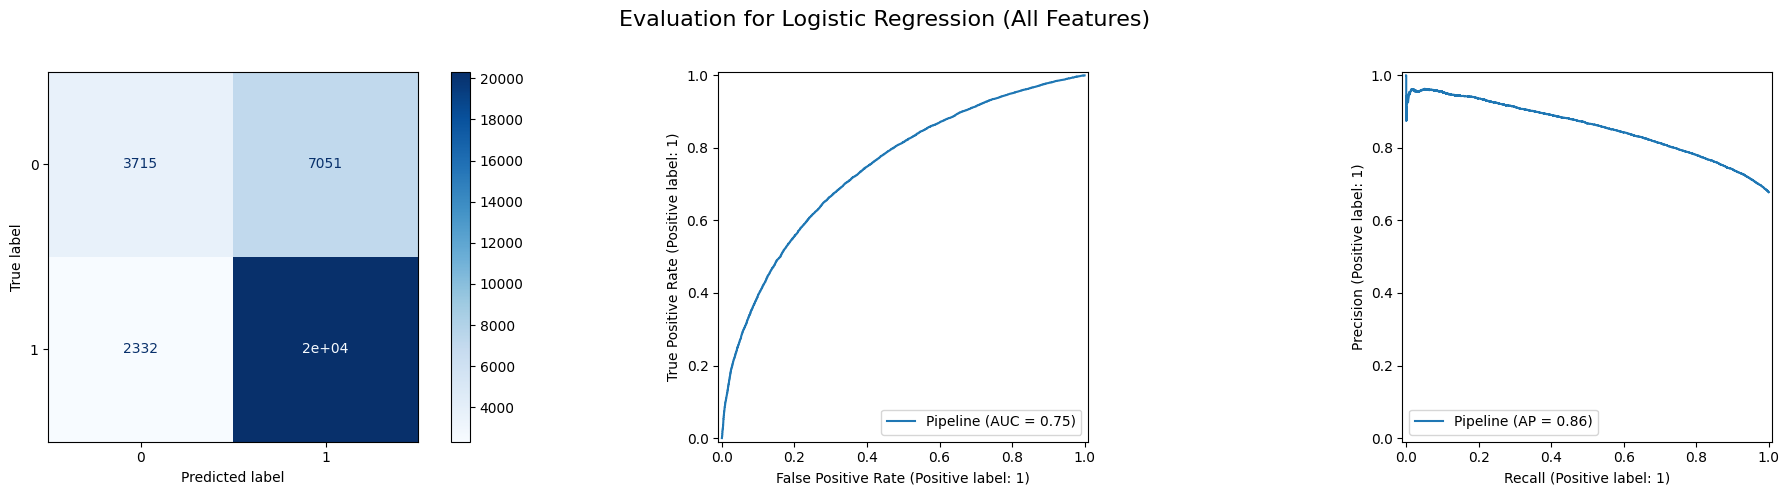


--- Coefficient Analysis ---
           Feature  Coefficient  Odds_Ratio
0     num__x_age80     0.982810    2.671955
39   cat__chccopd1     0.687155    1.988052
13    cat__x_age_g    -0.495166    0.609470
42   cat__chckdny1    -0.321590    0.724995
36   cat__cvdcrhd4    -0.268067    0.764857
18   cat__exerany2    -0.236959    0.789024
45   cat__pneuvac4    -0.232788    0.792321
25   cat__x_educag     0.229811    1.258363
41   cat__addepev2     0.195817    1.216305
37   cat__cvdstrk3     0.183105    1.200940
29  cat__x_metstat    -0.182255    0.833389
12    cat__genhlth    -0.158200    0.853679
38    cat__asthma3    -0.146637    0.863607
34   cat__checkup1    -0.143054    0.866707
3       num__wtkg3     0.130033    1.138866
11  cat__x_bmi5cat     0.127342    1.135805
35   cat__cvdinfr4     0.098794    1.103839
27    cat__marital    -0.093120    0.911085
44   cat__diffwalk     0.085980    1.089784
17  cat__x_totinda    -0.074819    0.927911
28   cat__x_incomg     0.070236    1.072761
8 

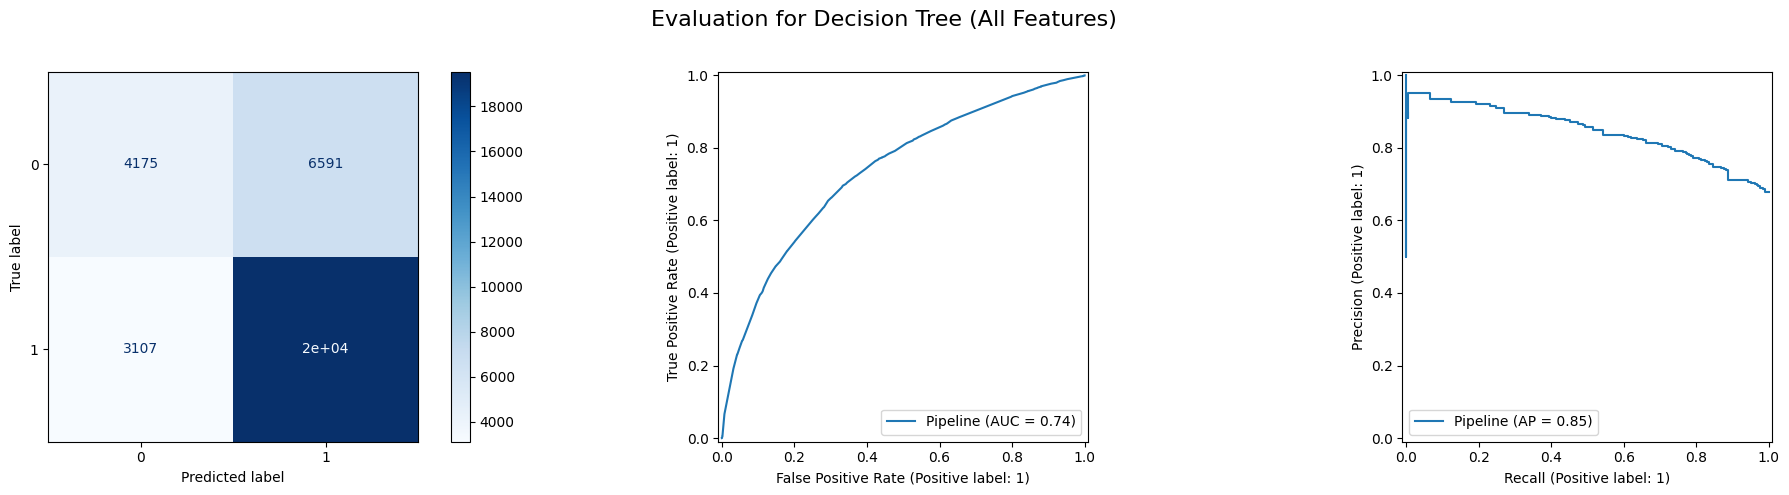


--- Decision Tree Analysis ---


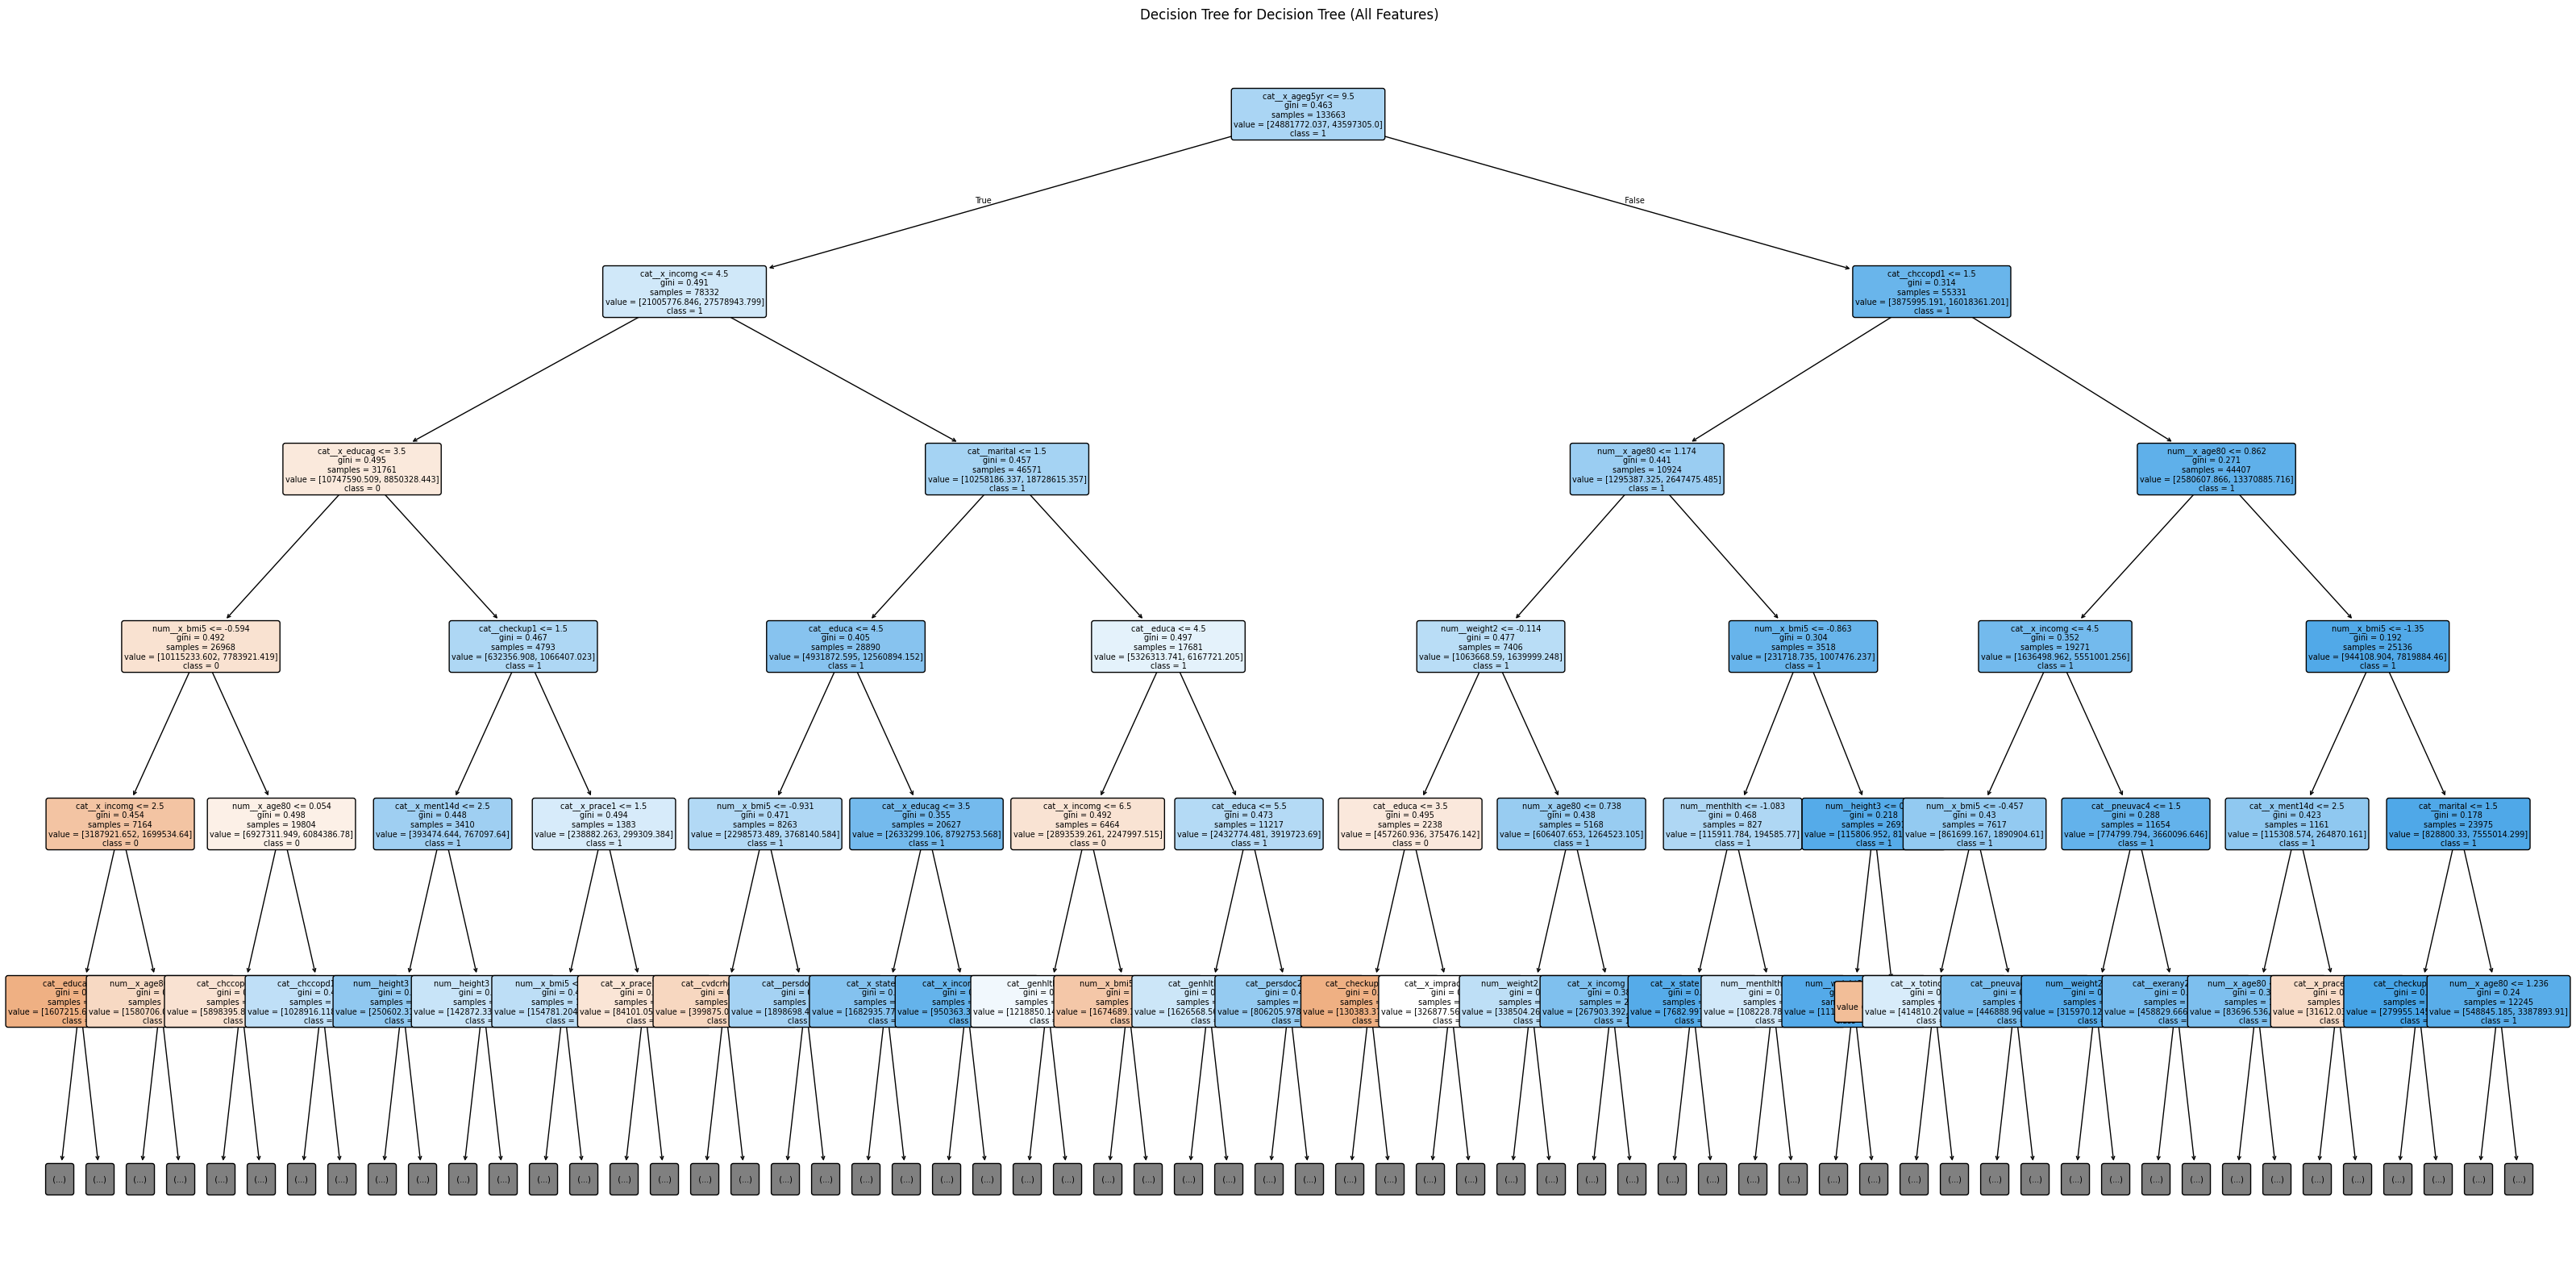

Tree Rules (first few levels):
 |--- cat__x_ageg5yr <= 9.50
|   |--- cat__x_incomg <= 4.50
|   |   |--- cat__x_educag <= 3.50
|   |   |   |--- num__x_bmi5 <= -0.59
|   |   |   |   |--- cat__x_incomg <= 2.50
|   |   |   |   |   |--- cat__educa <= 4.50
|   |   |   |   |   |   |--- cat__x_casthm1 <= 5.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cat__x_casthm1 >  5.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- cat__educa >  4.50
|   |   |   |   |   |   |--- num__x_age80 <= -1.44
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- num__x_age80 >  -1.44
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cat__x_incomg >  2.50
|   |   |   |   |   |--- num__x_age80 <= -1.63
|   |   |   |   |   |   |--- cat__genhlth <= 2.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- cat__genhlth >  2.50

===== Training model: LDA (All Features) =====
Model is LDA, fitting without sample_weight.
Traini

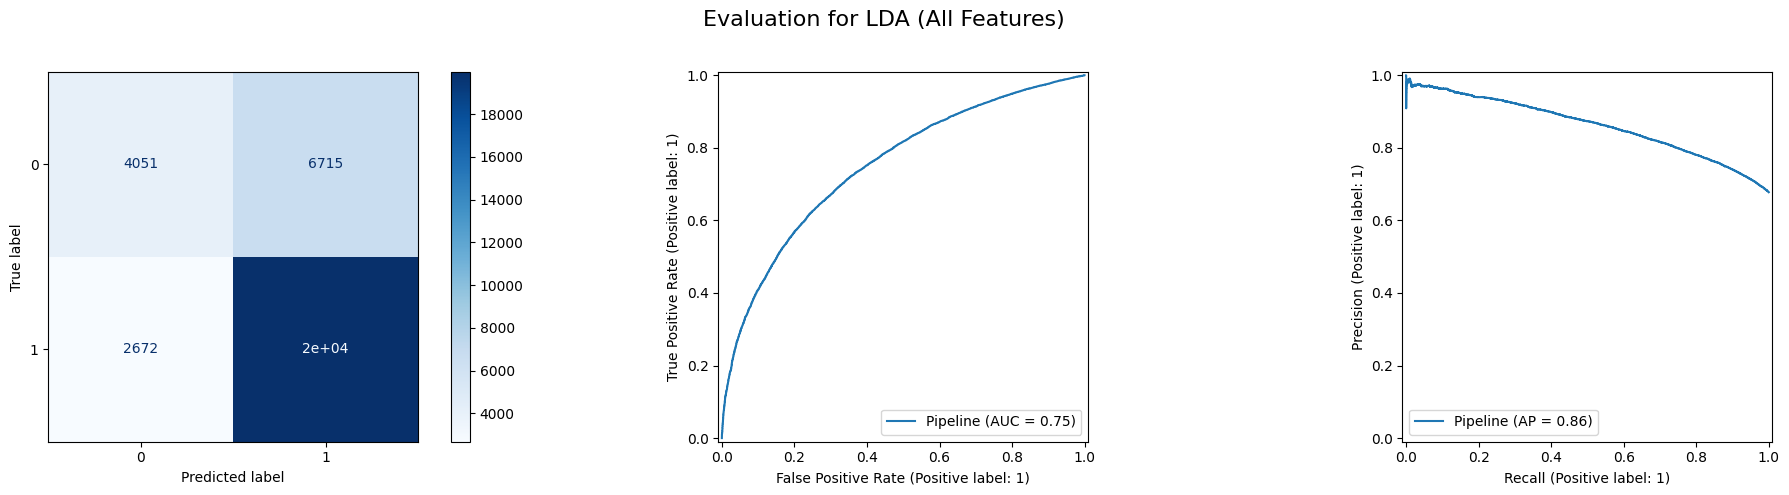


--- Coefficient Analysis ---
           Feature  Coefficient
0     num__x_age80     1.098822
39   cat__chccopd1     0.687256
13    cat__x_age_g    -0.490792
18   cat__exerany2    -0.322393
42   cat__chckdny1    -0.293265
36   cat__cvdcrhd4    -0.242248
26      cat__educa     0.231489
38    cat__asthma3    -0.209026
41   cat__addepev2     0.199219
34   cat__checkup1    -0.187450
45   cat__pneuvac4    -0.185643
12    cat__genhlth    -0.180346
35   cat__cvdinfr4     0.164946
37   cat__cvdstrk3     0.158962
11  cat__x_bmi5cat     0.140057
3       num__wtkg3     0.118673
29  cat__x_metstat    -0.116783
44   cat__diffwalk     0.111315
27    cat__marital    -0.107756
28   cat__x_incomg     0.077636
21       cat__sex1    -0.070453
25   cat__x_educag     0.067398
1      num__x_bmi5     0.060804
47  cat__x_ageg5yr     0.051933
17  cat__x_totinda    -0.047358
30  cat__x_urbstat    -0.045889
8    num__menthlth    -0.041253
43   cat__diabete3    -0.040517
19  cat__x_ment14d    -0.040088
40   cat__

In [67]:
# all features
print("\nAnalysis with All Features")
for name, model_constructor in models_to_run_full_suite.items():
    result = run_full_analysis(f"{name} (All Features)", model_constructor, preprocessor, X, y, weights)
    all_features_results.append(result)


In [68]:
# Compare results
print("\nFinal Comparison Table")
vif_df = pd.DataFrame(vif_results)
all_df = pd.DataFrame(all_features_results)
final_results = pd.concat([vif_df, all_df]).set_index('Model')
print(final_results.sort_values(by='AUC', ascending=False))



Final Comparison Table
                                    Accuracy  F1-Score       AUC   Time (s)
Model                                                                      
LightGBM (All Features)             0.699425  0.708601  0.776744   3.895520
CatBoost (All Features)             0.706578  0.714835  0.776510  48.633263
XGBoost (All Features)              0.701371  0.709567  0.766445   2.899267
LightGBM (VIF)                      0.685271  0.695192  0.760950   2.402577
CatBoost (VIF)                      0.691974  0.701219  0.760168  43.630477
LDA (All Features)                  0.719087  0.698125  0.751069   1.468045
XGBoost (VIF)                       0.686228  0.695247  0.747965   3.630469
Logistic Regression (All Features)  0.719206  0.693046  0.746784  32.593764
Decision Tree (All Features)        0.709780  0.692131  0.737113   1.347003
Decision Tree (VIF)                 0.707835  0.690184  0.727145   0.860361
LDA (VIF)                           0.699096  0.666562  0.719361

### PCA

چه کاری انجام می‌دهد؟ PCA ویژگی‌های اولیه شما را به مجموعه‌ای جدید از ویژگی‌های ناهمبسته تبدیل می‌کند و همزمان می‌تواند ابعاد داده را کاهش دهد.

کِی باید استفاده کرد؟ زمانی که قصد دارید از مدل‌های حساس به هم‌خطی (مانند رگرسیون لجستیک) استفاده کنید و رفع هم‌خطی برای شما یک اولویت است.

ویژگی‌های جدید (مؤلفه‌های اصلی) دیگر به راحتی قابل تفسیر نیستند.

یک عیب PCA این است که مؤلفه‌های اصلی جدید، ترکیبی خطی از ویژگی‌های اولیه هستند و دیگر به راحتی قابل تفسیر نیستند. برای مثال، PC1 ممکن است چیزی شبیه به (0.4 * سن) - (0.6 * BMI) + (0.7 * درآمد) باشد. بنابراین، اگر هدف اصلی شما تفسیر ضرایب تک تک ویژگی‌های اولیه باشد، PCA بهترین انتخاب نیست.

In [70]:
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_vif),
    ('pca', PCA(n_components=0.95)),  # n_components: تعداد مؤلفه‌ها
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X_vif, y, weights, test_size=0.2, random_state=42, stratify=y
)

# ۴. آموزش پایپ‌لاین با استفاده از وزن‌ها (sample_weight)
print("\nآموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...")
pca_pipeline.fit(X_train, y_train, classifier__sample_weight=weights_train)
print("آموزش کامل شد.")

# ۵. بررسی نتایج PCA
# می‌توانیم ببینیم PCA چند مؤلفه را انتخاب کرده است
num_components = pca_pipeline.named_steps['pca'].n_components_
print(f"\nتعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): {num_components}")

# ۶. ارزیابی مدل نهایی
y_pred_pca_lr = pca_pipeline.predict(X_test)

print("\n--- نتایج مدل Logistic Regression پس از PCA ---")
print(f"دقت (Accuracy): {accuracy_score(y_test, y_pred_pca_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca_lr))



آموزش پایپ‌لاین PCA + Logistic Regression با وزن‌های نمونه...
آموزش کامل شد.

تعداد مؤلفه‌های اصلی انتخاب شده توسط PCA (برای حفظ ۹۵٪ واریانس): 4

--- نتایج مدل Logistic Regression پس از PCA ---
دقت (Accuracy): 0.6912

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.13      0.21     10766
           1       0.70      0.96      0.81     22650

    accuracy                           0.69     33416
   macro avg       0.65      0.54      0.51     33416
weighted avg       0.67      0.69      0.61     33416

